# Lending Club Case Study Notebook

### Problem Statement 

Identification of driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  So that the company can utilize this knowledge for its portfolio and risk assessment. 

In [69]:
# Steps of analysis:
# 1. Data Understanding
# 2. Data Wrangling
# 3. Data Visualization and Analysis
# 4. Conclusion

### Importing all necessary libraries

In [70]:
# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#plotting
import plotly.express as px 

#Extra
import warnings
warnings.filterwarnings('ignore')

### Setting Dataframe display options

In [71]:
#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


### Loading the data 

In [72]:
loan_df = pd.read_csv('loan.csv')

### Checking the Data Information

In [73]:
loan_df.info()
loan_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


(39717, 111)

In [74]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Checking for null columns

In [75]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Observation: There are lot of columns in whole dataset with no data / Null values.

In [76]:
# checking how many columns have all missing values
print('Number of empty Columns:')
print(loan_df.isnull().all(axis=0).sum())


Number of empty Columns:
54


#### Observation: There are 54 columns have all missing values.

In [77]:
# Check for duplicate rows in dataset based on id column

print(loan_df.duplicated(subset=None, keep='first').count())
dup=loan_df[loan_df.duplicated(['id'])]
dup

39717


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


#### Observation: There are no duplicate values in the data set

In [78]:
# sum it up to check how many rows have all missing values
print('Number of empty Rows:')
print(loan_df.isnull().all(axis=1).sum())


Number of empty Rows:
0


#### Observation: There are no empty rows in whole dataset.

### Data Cleaning

#### Removing the columns with no data 

In [79]:
# Lets Drop columns where all values are null. Below in sequence all columns have null values

loan_df.drop(loan_df.iloc[:, 53:105], inplace = True, axis = 1) 

In [80]:
loan_df.shape

(39717, 59)

In [81]:
# Drop additional columns as these are mostly nulls as it might not contribute to the loan defaulting data analysis.

c_drop_list1 = ["desc","mths_since_last_delinq","mths_since_last_record","next_pymnt_d","tot_hi_cred_lim"]
loan_df.drop(labels = c_drop_list1, axis =1, inplace=True)
c_drop_list2 = ["mths_since_last_major_derog","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"]
loan_df.drop(labels = c_drop_list2, axis =1, inplace=True)
c_drop_list3 = ["member_id","url","emp_title","zip_code","tax_liens","last_credit_pull_d","title"]
loan_df.drop(labels = c_drop_list3, axis =1, inplace=True)


In [82]:
loan_df.shape

(39717, 43)

Now we have 43 columns out of which some columns are corresponding to the post approval of loan. As we are only interested in analyzing the driving factors of loan defaulting before loan approval. So we can remove variables which are not corresponding to that scenario.

List of post-approval features which can be removed as it won't contribute value to the loan defaulting data analysis

delinq_2yrs
revol_bal
out_prncp
total_pymnt
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt

In [83]:
pa_drop_list1 = ["policy_code","inq_last_6mths","delinq_2yrs","revol_bal","out_prncp","total_pymnt","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt"]
loan_df.drop(labels = pa_drop_list1, axis =1, inplace=True)

In [84]:
loan_df.shape

(39717, 30)

In [85]:
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp_inv', 'total_pymnt_inv', 'collections_12_mths_ex_med',
       'application_type', 'pub_rec_bankruptcies'],
      dtype='object')

In [86]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,collections_12_mths_ex_med,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,3,0,83.70%,9,f,0.00,5833.84,0.0,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,3,0,9.40%,4,f,0.00,1008.71,0.0,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,Nov-01,2,0,98.50%,10,f,0.00,3005.67,0.0,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,Feb-96,10,0,21%,37,f,0.00,12231.89,0.0,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,Jan-96,15,0,53.90%,38,f,524.06,3513.33,0.0,INDIVIDUAL,0.0


#### Observation : Cleaning/fixing the data like Interest field and employee lenght have symbols. 

In [87]:
# changing the Interest fields amd employee lenght to numbers 
# Changing the Term to numeric value
loan_df['term']=loan_df['term'].apply(lambda x: int(x.replace(' months',''))).astype(int)
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')

loan_df.emp_length.fillna('0',inplace=True)
loan_df['emp_length']=loan_df.emp_length.str.extract('(\d+)')

loan_df['grade']=loan_df['grade'].astype('category')
loan_df['sub_grade']=loan_df['sub_grade'].astype('category')
loan_df['home_ownership']=loan_df['home_ownership'].astype('category')
loan_df['verification_status']=loan_df['verification_status'].astype('category')
loan_df['purpose']=loan_df['purpose'].astype('category')
loan_df['addr_state']=loan_df['addr_state'].astype('category')

loan_df.head(2)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,collections_12_mths_ex_med,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,3,0,83.70,9,f,0.0,5833.84,0.0,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,3,0,9.40,4,f,0.0,1008.71,0.0,INDIVIDUAL,0.0


In [88]:
# convert amount columns into numeric data to find some correlation among important ones.

cols = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc',
         'dti','emp_length']

loan_df[cols] = loan_df[cols].apply(pd.to_numeric)

In [89]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,collections_12_mths_ex_med,application_type,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,Jan-85,3,0,83.70,9,f,0.00,5833.84,0.0,INDIVIDUAL,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,Apr-99,3,0,9.40,4,f,0.00,1008.71,0.0,INDIVIDUAL,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,Nov-01,2,0,98.50,10,f,0.00,3005.67,0.0,INDIVIDUAL,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,CA,20.00,Feb-96,10,0,21,37,f,0.00,12231.89,0.0,INDIVIDUAL,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,n,other,OR,17.94,Jan-96,15,0,53.90,38,f,524.06,3513.33,0.0,INDIVIDUAL,0.0


In [90]:
# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(loan_df.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


In [91]:
# pub_rec_bankruptcies can be cleaned for further analysis.
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)
print(loan_df.pub_rec_bankruptcies.isnull().sum())

0


#### Checking for missing values

In [92]:
(loan_df.isna().sum()/len(loan_df.index))*100

id                            0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
earliest_cr_line              0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_util                    0.125891
total_acc                     0.000000
initial_list_status           0.000000
out_prncp_inv            

#### Handling Missing values



In [93]:
#columns with missing values are "emp_length", "revol_util".
#So before doing that, lets see what kind of data each column has.

In [94]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   id                          39717 non-null  int64   
 1   loan_amnt                   39717 non-null  int64   
 2   funded_amnt                 39717 non-null  int64   
 3   funded_amnt_inv             39717 non-null  float64 
 4   term                        39717 non-null  int64   
 5   int_rate                    39717 non-null  float64 
 6   installment                 39717 non-null  float64 
 7   grade                       39717 non-null  category
 8   sub_grade                   39717 non-null  category
 9   emp_length                  39717 non-null  int64   
 10  home_ownership              39717 non-null  category
 11  annual_inc                  39717 non-null  float64 
 12  verification_status         39717 non-null  category
 13  issue_d         

In [95]:
loan_df.emp_length.value_counts()


emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
0     1075
Name: count, dtype: int64

The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.
This means that we can safely assign the value of mode to the null values in the column.
Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.


In [96]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0], inplace = True)
loan_df.emp_length.isna().sum()


0

# Derived columns

In [97]:
# Lets derive some new columns using existing data as it may further used in analysis.
# create month and year columns separately

loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_year']=loan_df['issue_d'].dt.year
loan_df['issue_month']=loan_df['issue_d'].dt.month

loan_df.head(1)

# Observations : Two new columns month and year were derived from issue date

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,collections_12_mths_ex_med,application_type,pub_rec_bankruptcies,issue_year,issue_month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,Jan-85,3,0,83.70,9,f,0.0,5833.84,0.0,INDIVIDUAL,0.0,2011,12


As we can only perform analysis on the Completed loan or Defaulted loans data thus filtering the completed and defaulted loan entries.

In [98]:
# Removing loans with status as 'Current'
loan_df = loan_df[loan_df.loan_status!='Current']
# Shape of the dataframe after removing columns
print(loan_df.shape)


(38577, 32)


As the data has been cleaned, fixed and filtered as per requirement, we can select columns required for analysis and move ahead with the analysis. 

In [99]:
# selecting columns which are relavent for our analysis
## Id, Loan Amount, Term of loan, Interest Rate, Grade, Sub Grade, Emp Length, Home Ownership, Verification Status, Annual Income, Loan Status,Purpose of Loan, State provided by burrower, DTI ratio, Number of public record bankruptcies and derived columns of Issue month and year
loan_df = loan_df[['id','loan_amnt','term','int_rate','grade','sub_grade','emp_length','home_ownership','verification_status','annual_inc','loan_status','purpose','addr_state','dti','pub_rec_bankruptcies','issue_year','issue_month']]
# Shape of the dataframe after removing columns
loan_df.shape

(38577, 17)

In [100]:
loan_df.columns

Index(['id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'verification_status', 'annual_inc',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies',
       'issue_year', 'issue_month'],
      dtype='object')

As term column is having "month" string and having two values for all the records we can consider the column as categorical.

In [101]:
num_cols=["loan_amnt","dti","int_rate","annual_inc"] 
cat_cols=["term","grade","sub_grade","emp_length","addr_state","pub_rec_bankruptcies","home_ownership","issue_year","issue_month","verification_status","loan_status","purpose"] 
extra_cols=["id"] 
len(num_cols)+len(cat_cols)+len(extra_cols)

17

### Outlier Treatment

<Axes: >

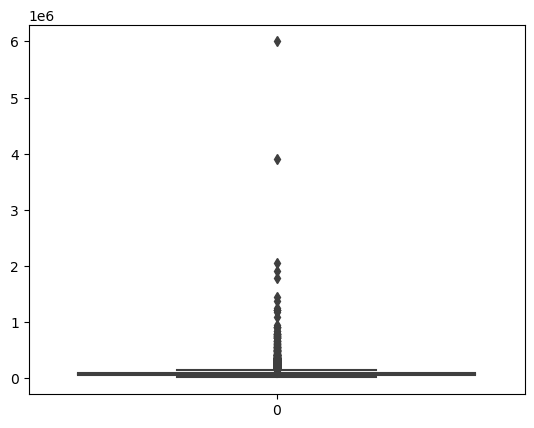

In [102]:
sns.boxplot(loan_df['annual_inc'])

Above box plot clearly indicates presence of outliers.
Let's see the quantile info and take an appropriate action.

The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.
So, considering threshold for removing outliers as 0.95

In [103]:
quantile_info = loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

In [104]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]

<Axes: >

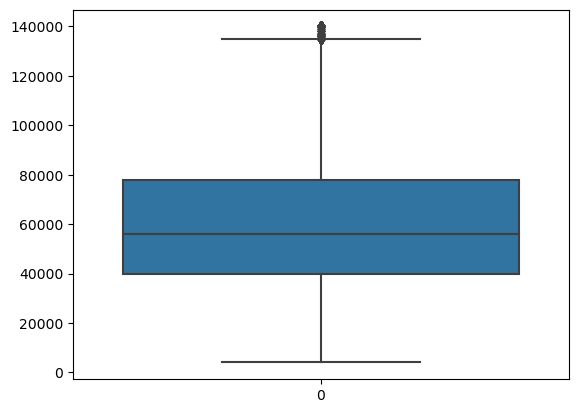

In [105]:
sns.boxplot(loan_df.annual_inc)

Analysing other numerical variables which could possibly have outliers.

dti
loan_amnt


<Axes: >

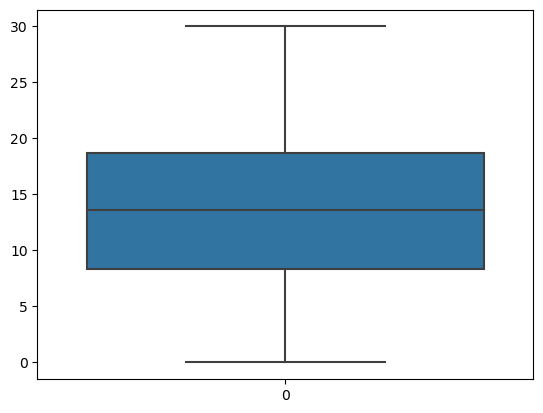

In [106]:
sns.boxplot(loan_df.dti)


## Univariant Analysis

Firstly Trying to plot and analysis all the numberic and categorical data and then Analyse the indiviual data according to our requirement

### Visualizing Numeric Data:

boxplot of loan_amnt


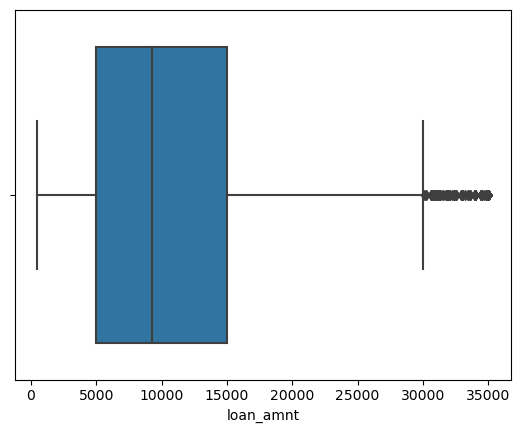

boxplot of dti


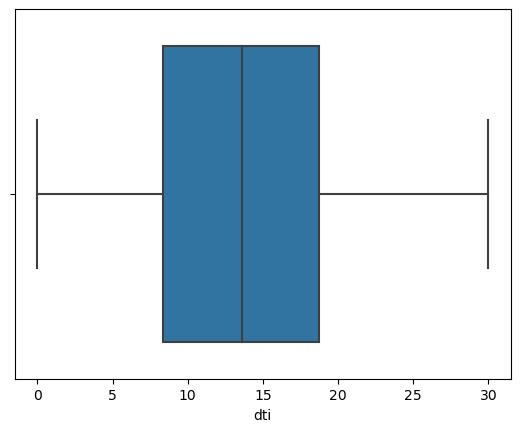

boxplot of int_rate


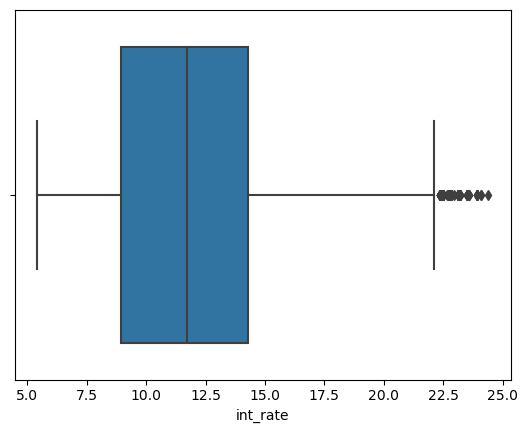

boxplot of annual_inc


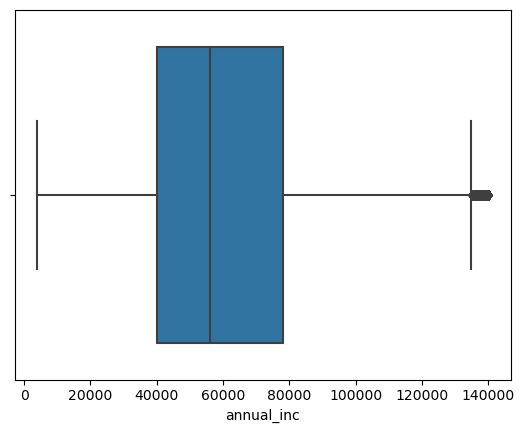

In [107]:
# Trying to Analysing all the numeric data by ploting a boxplot

for i in num_cols:
    print("boxplot of",i)
    sns.boxplot(x=loan_df[i])
    plt.show()

Histplot of loan_amnt


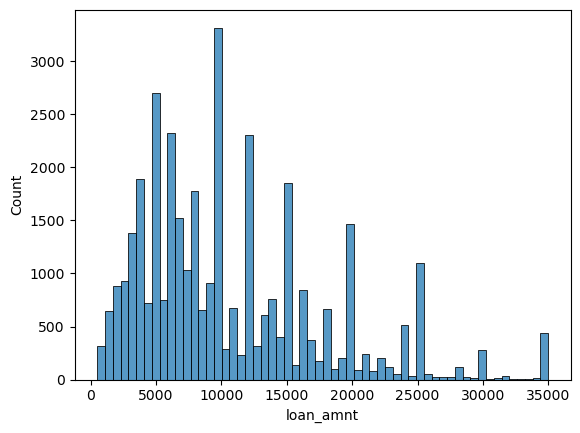

Histplot of dti


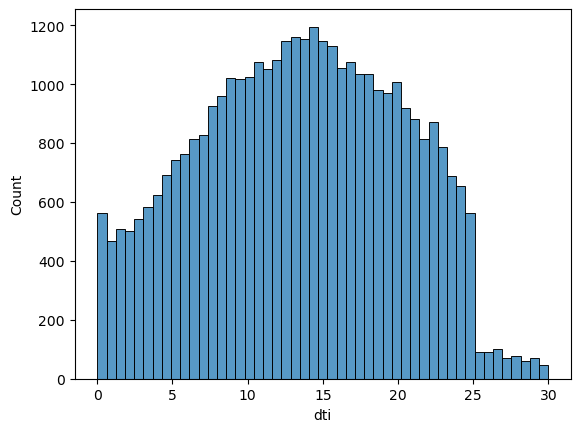

Histplot of int_rate


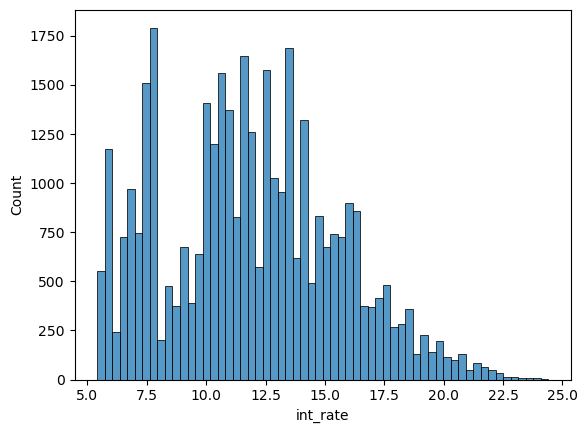

Histplot of annual_inc


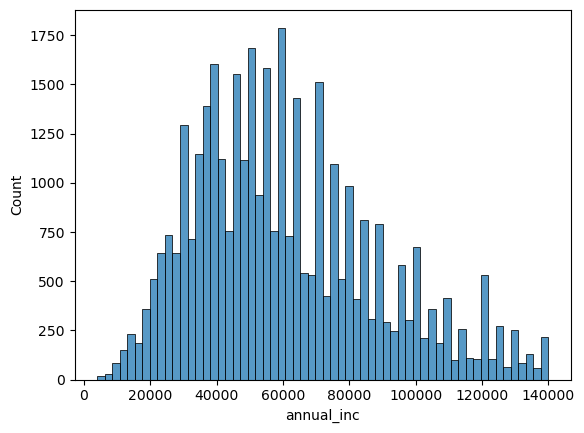

In [108]:
# Trying to Analysing all the numeric data by ploting a Histplot

for i in num_cols:
    print("Histplot of",i)
    sns.histplot(x=loan_df[i])
    plt.show()

### Visualizing Categorical Data

Countplot of term


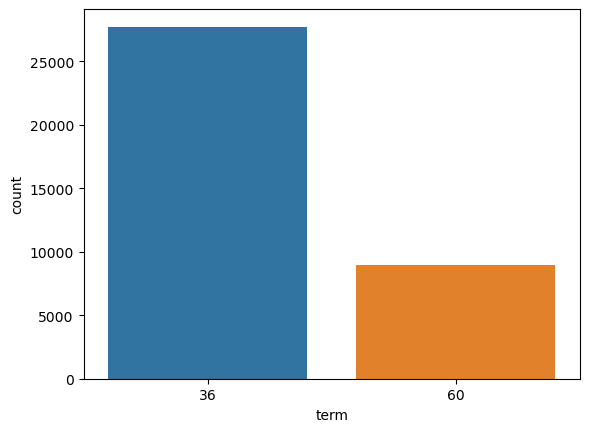

Countplot of grade


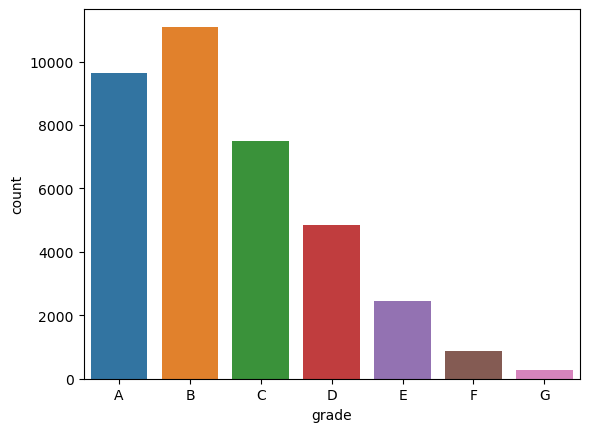

Countplot of sub_grade


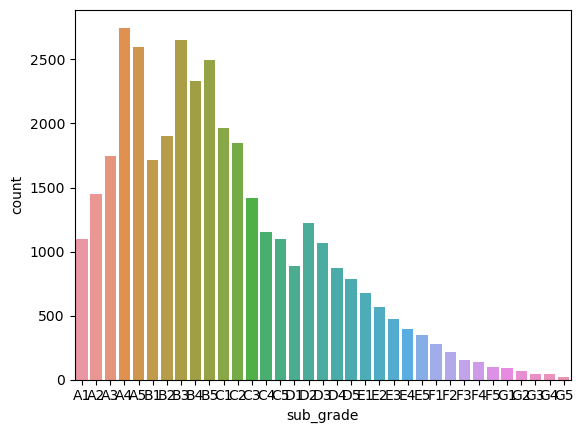

Countplot of emp_length


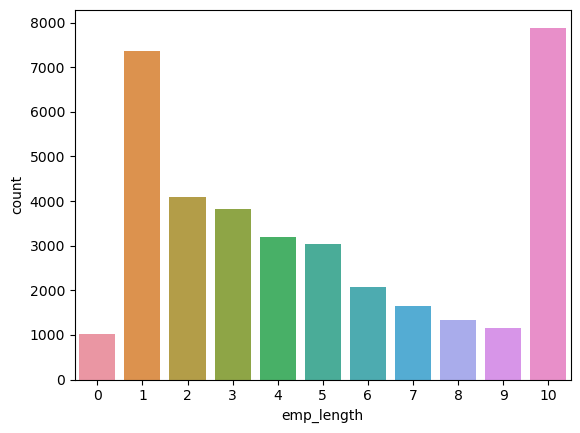

Countplot of addr_state


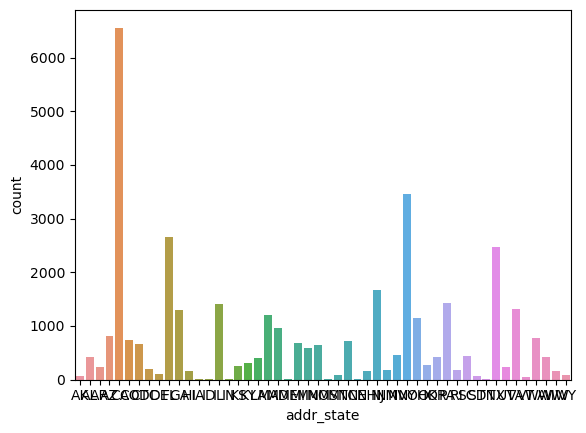

Countplot of pub_rec_bankruptcies


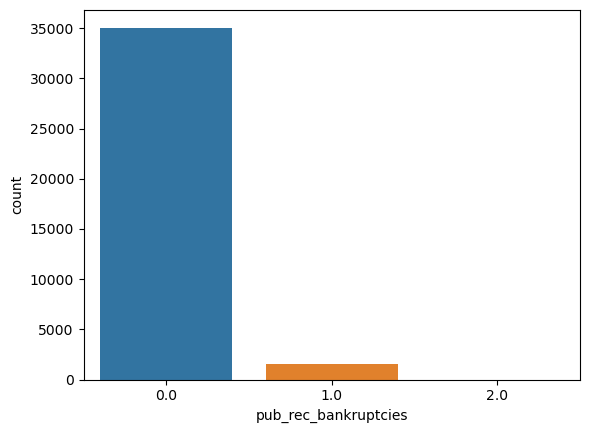

Countplot of home_ownership


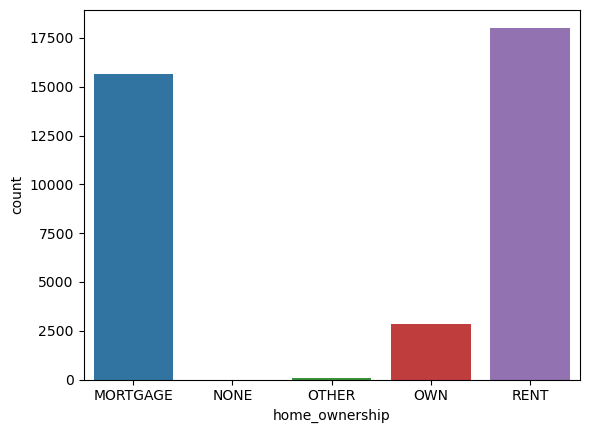

Countplot of issue_year


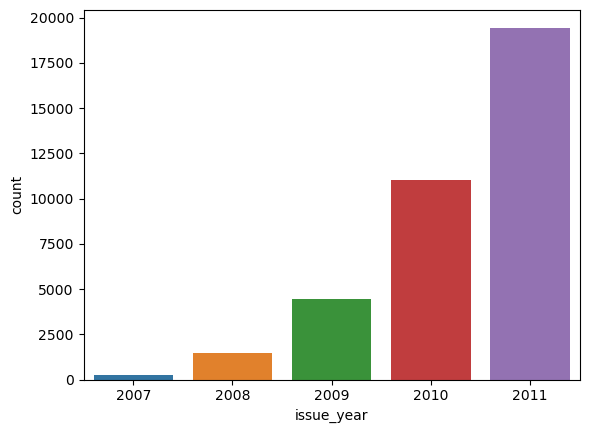

Countplot of issue_month


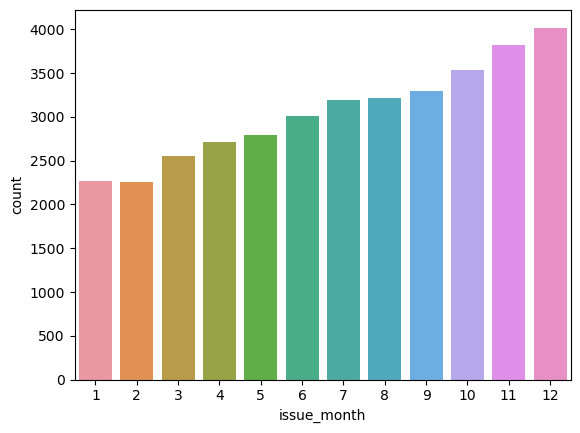

Countplot of verification_status


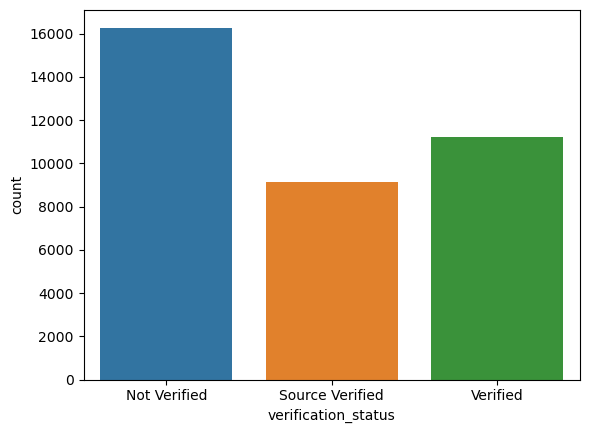

Countplot of loan_status


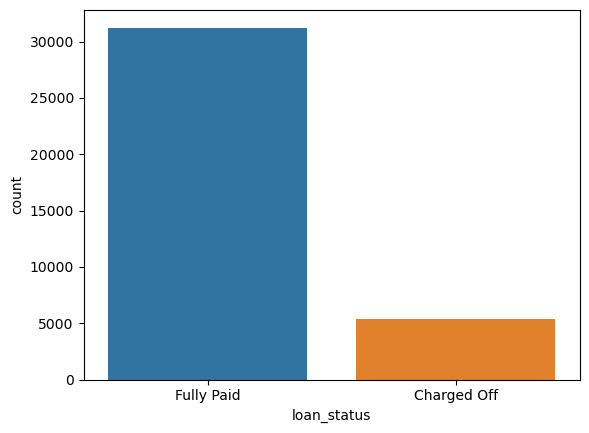

Countplot of purpose


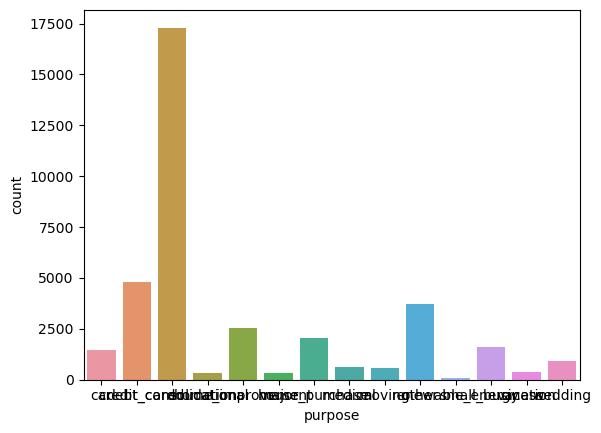

In [109]:
# Trying to Analysing all the categorical data by ploting a countplot
for i in cat_cols:
    print("Countplot of",i)
    sns.countplot(x=loan_df[i])
    plt.show()

# Numeric Data Analysing indiviually 

In [110]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36654 entries, 0 to 39716
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id                    36654 non-null  int64   
 1   loan_amnt             36654 non-null  int64   
 2   term                  36654 non-null  int64   
 3   int_rate              36654 non-null  float64 
 4   grade                 36654 non-null  category
 5   sub_grade             36654 non-null  category
 6   emp_length            36654 non-null  int64   
 7   home_ownership        36654 non-null  category
 8   verification_status   36654 non-null  category
 9   annual_inc            36654 non-null  float64 
 10  loan_status           36654 non-null  object  
 11  purpose               36654 non-null  category
 12  addr_state            36654 non-null  category
 13  dti                   36654 non-null  float64 
 14  pub_rec_bankruptcies  36654 non-null  float64 
 15  issue_y

loan_status
Fully Paid     85.21853
Charged Off    14.78147
Name: count, dtype: float64


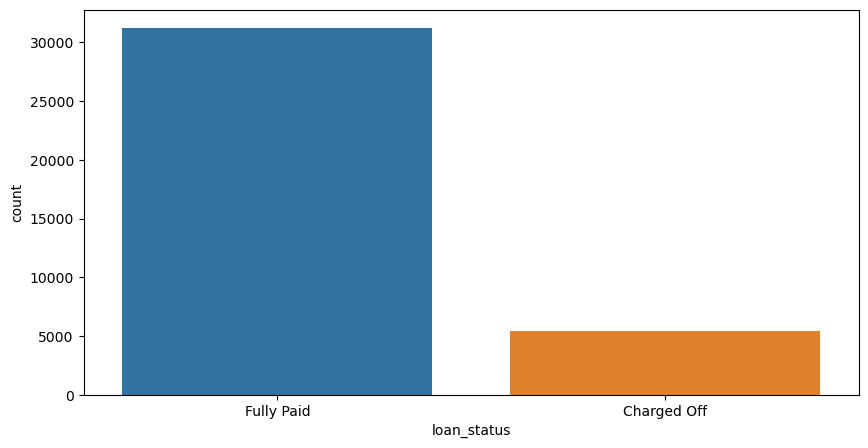

In [111]:
print(loan_df.loan_status.value_counts()*100/loan_df.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
sns.countplot(x=loan_df['loan_status'])
plt.show()

Observation : Defaulted loan are low in numbers compared to Fully Paid.

In [112]:
# Loan Amount
print(loan_df.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(loan_df,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


observation: The loan amount varies from 500 to 35000 with a mean of 9800.

term
36    75.628854
60    24.371146
Name: count, dtype: float64


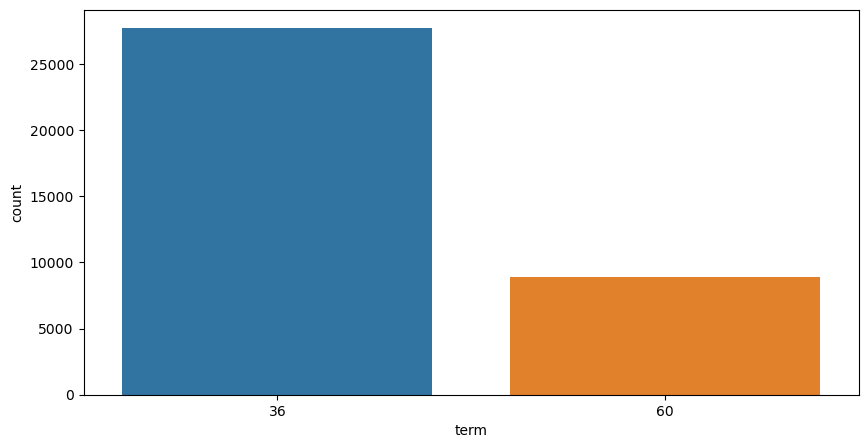

In [113]:
# How is Term of loan Effecting
print(loan_df.term.value_counts()*100/loan_df.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
sns.countplot(x=loan_df["term"])
plt.show()

Observation: More than half of the loan taken has term of 36 months.

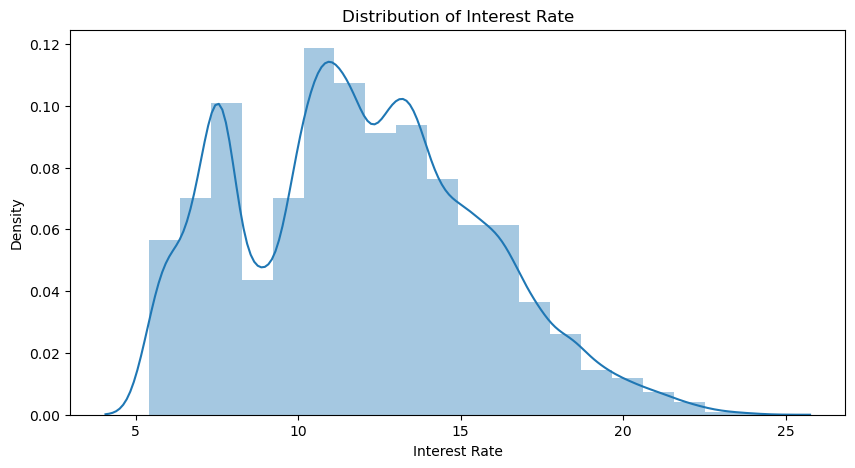

In [114]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(loan_df.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

Observation: The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.

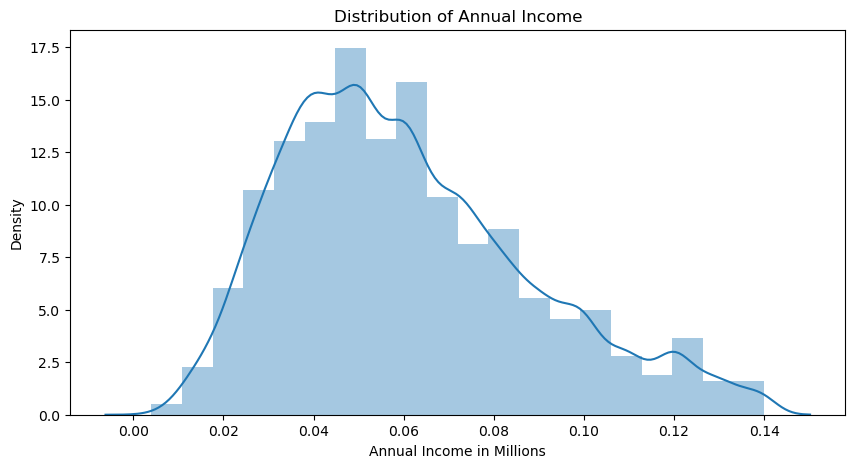

In [115]:
# Distribution of annual_inc
plt.figure(figsize=(10,5))
sns.distplot(x = loan_df["annual_inc"]/1000000,kde=True,bins=20)
plt.xlabel('Annual Income in Millions')
plt.ylabel('Density')
plt.title('Distribution of Annual Income',fontsize=12)
plt.show()

Observation : Annual Income shows left skewed normal distribution thus we can say that the majority of burrowers have very low annual income compared to rest.

### Categorical Data Analyzing Individually

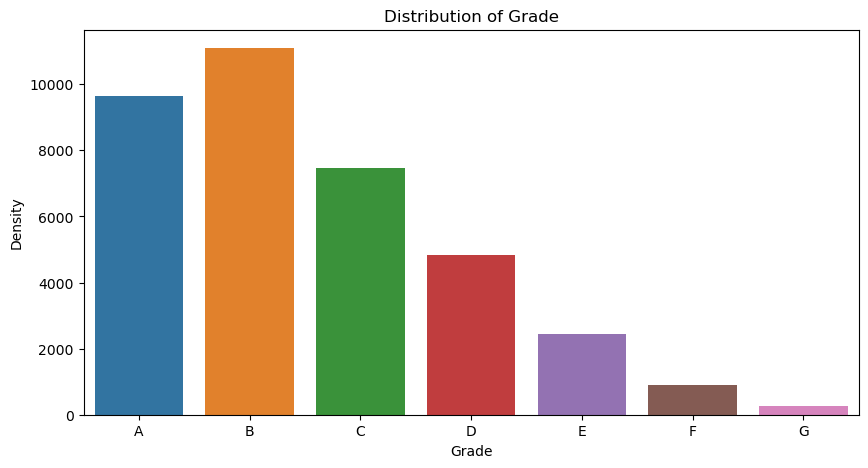

In [116]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(x = loan_df["grade"])
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Grade')
plt.show()

In [117]:
Observation: A large amount of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.

SyntaxError: invalid syntax (1841028623.py, line 1)

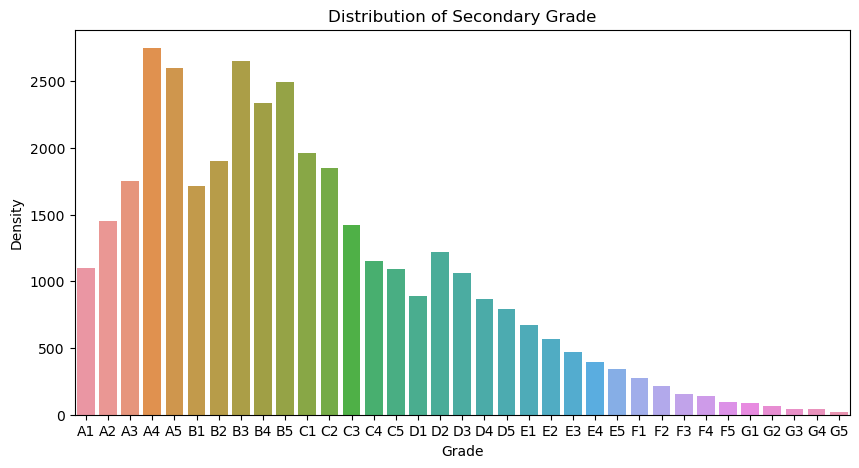

In [118]:
# Distribution of Grade
plt.figure(figsize=(10,5))
sns.countplot(x=loan_df["sub_grade"])
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Distribution of Secondary Grade')
plt.show()

Observation: A large amount of loans are with lower subgrade in grade 'A' and 'B' commpared to rest showing most loans are high grade loans. This matches with the Grade distribution

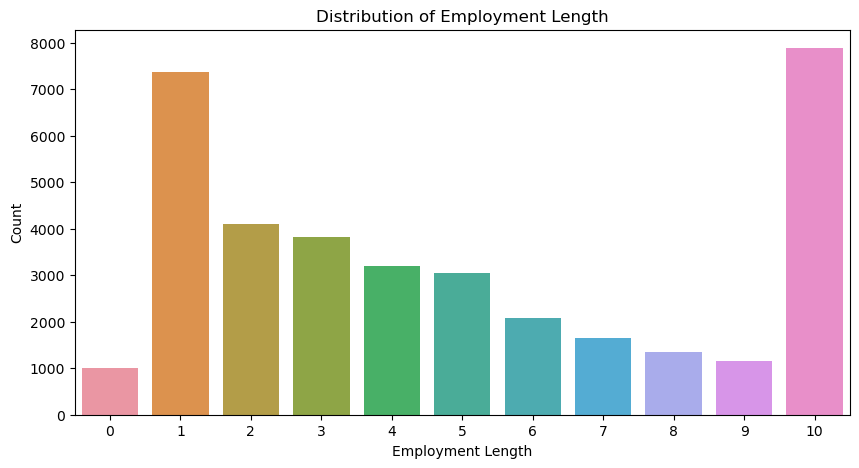

In [119]:
# Distribution of emp_length
plt.figure(figsize=(10,5))
sns.countplot(x = loan_df["emp_length"])
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=12)
plt.show()

Observation : Majority of borrowsers have working experience greater than 10 years

Analysing home_ownership

In [120]:
#checking unique values for home_ownership
loan_df['home_ownership'].unique()

['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE']
Categories (5, object): ['MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT']

In [121]:
#replacing 'NONE' with 'OTHERS' as there are only 3 values with 'NONE'
loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

<Axes: xlabel='home_ownership', ylabel='count'>

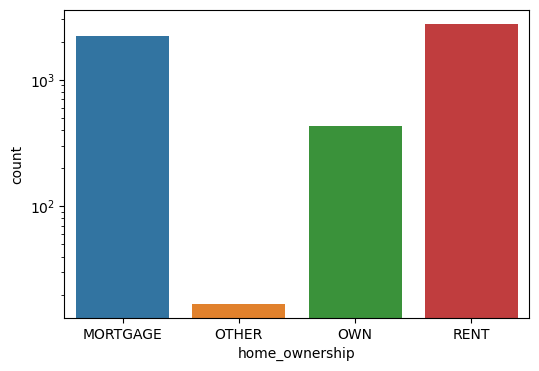

In [122]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_df[loan_df['loan_status']=='Charged Off'])

Observation: Majority of borrowsers don't posses property and are on mortage or rent.

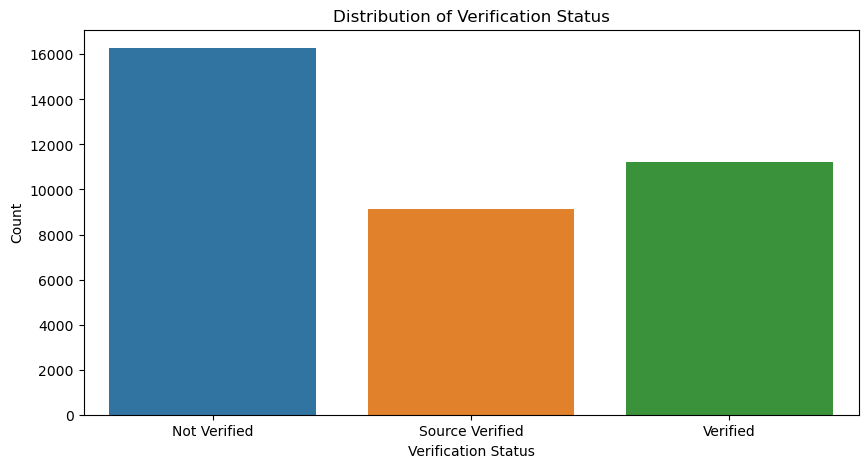

In [123]:
# Distribution of verification_status
plt.figure(figsize=(10,5))
sns.countplot(x = loan_df["verification_status"])
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verification Status',fontsize=12)
plt.show()

Observation: Above 50% of the borrowers are verified by the company or have source verified.

<Axes: xlabel='count', ylabel='purpose'>

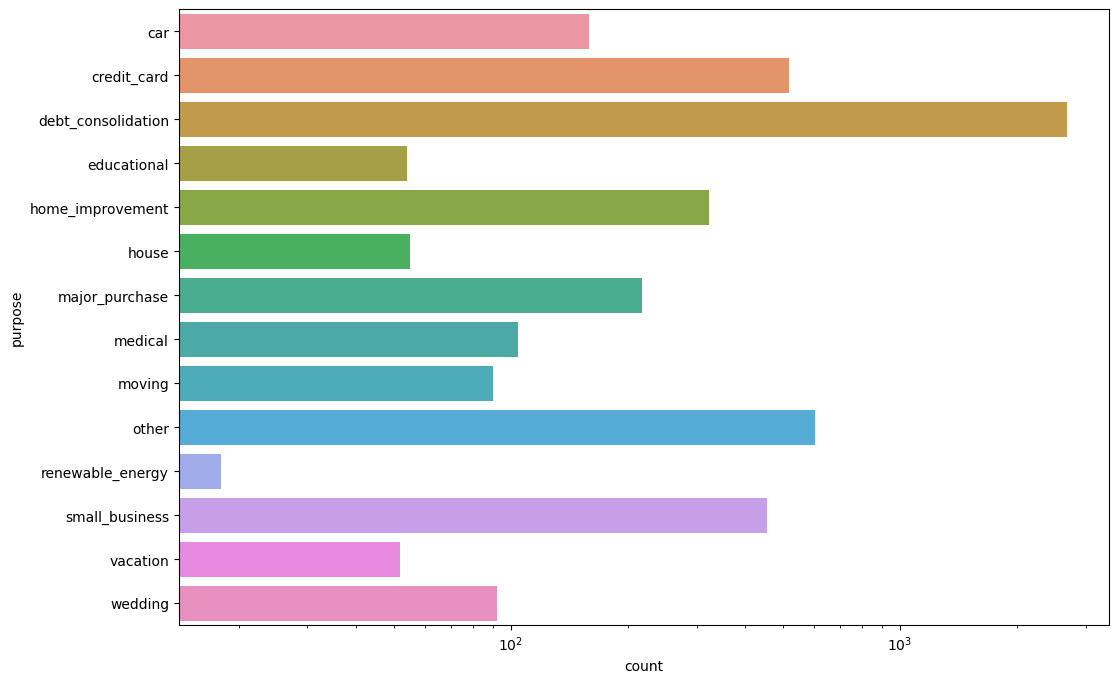

In [124]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_df[loan_df.loan_status == 'Charged Off'])

Observation: A large percentage of loans are taken for debt consolidation followed by credit card.

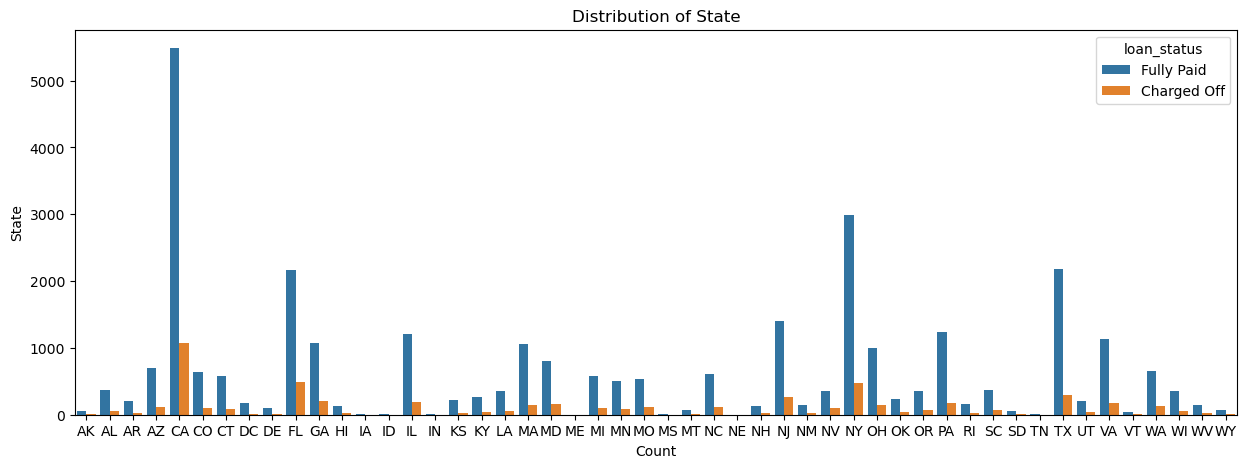

In [125]:
# Distribution of addr_state
plt.figure(figsize=(15,5))
sns.countplot(x = loan_df["addr_state"],hue=loan_df.loan_status)
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=12)
plt.show()

Observation: Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc

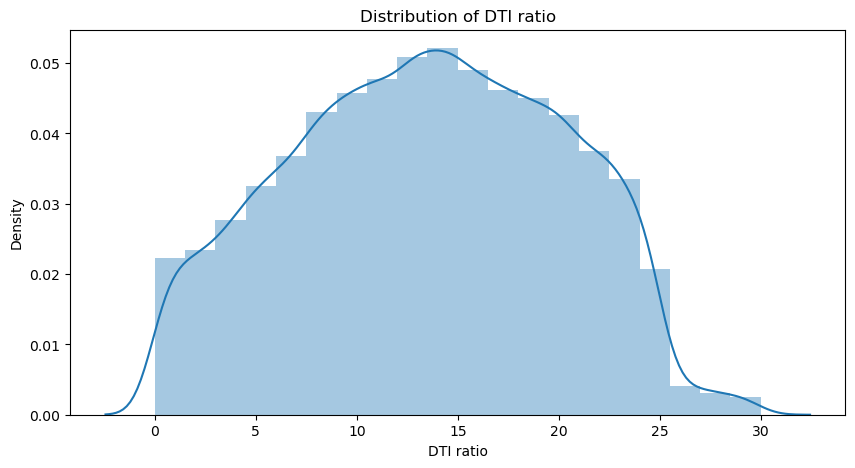

In [126]:
# Distribution of dti
plt.figure(figsize=(10,5))
sns.distplot(loan_df.dti,kde=True,bins=20)
plt.xlabel('DTI ratio')
plt.ylabel('Density')
plt.title('Distribution of DTI ratio',fontsize=12)
plt.show()

Observation: Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.

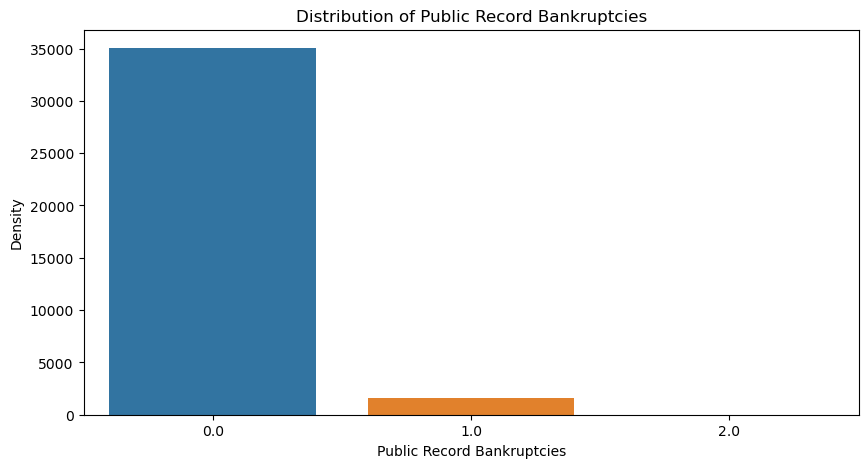

In [127]:
# Distribution of pub_rec_bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(x = loan_df["pub_rec_bankruptcies"])
plt.xlabel('Public Record Bankruptcies')
plt.ylabel('Density')
plt.title('Distribution of Public Record Bankruptcies',fontsize=12)
plt.show()

In [128]:
Observation : Majority of the borrowers have no record of Public Recorded Bankruptcy.

SyntaxError: invalid syntax (3173496460.py, line 1)

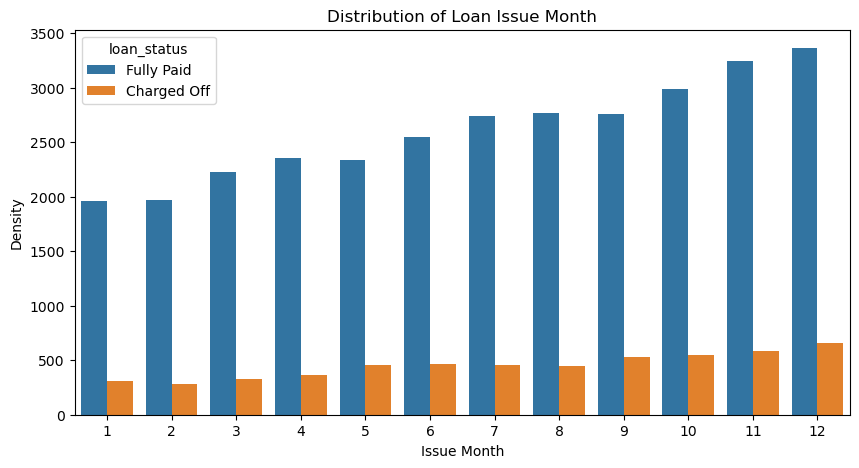

In [129]:
# Distribution of issue_month
plt.figure(figsize=(10,5))
sns.countplot(x = loan_df["issue_month"],hue=loan_df.loan_status)
plt.xlabel('Issue Month')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Month',fontsize=12)
plt.show()

Observation : Majority of the loans are given in last quarter of the year.

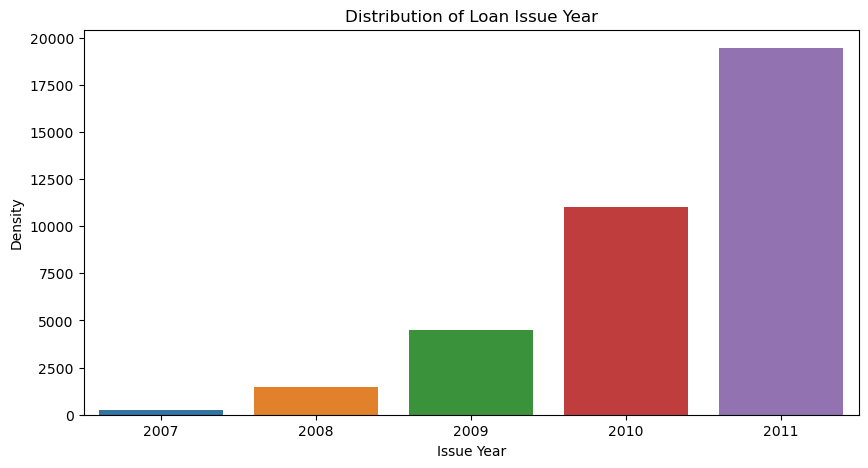

In [130]:
# Distribution of issue_year
plt.figure(figsize=(10,5))
sns.countplot(x = loan_df.issue_year)
plt.xlabel('Issue Year')
plt.ylabel('Density')
plt.title('Distribution of Loan Issue Year',fontsize=12)
plt.show()

Observation : The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

###  Segmented Univariate Analysis ( Based on Loan_status)

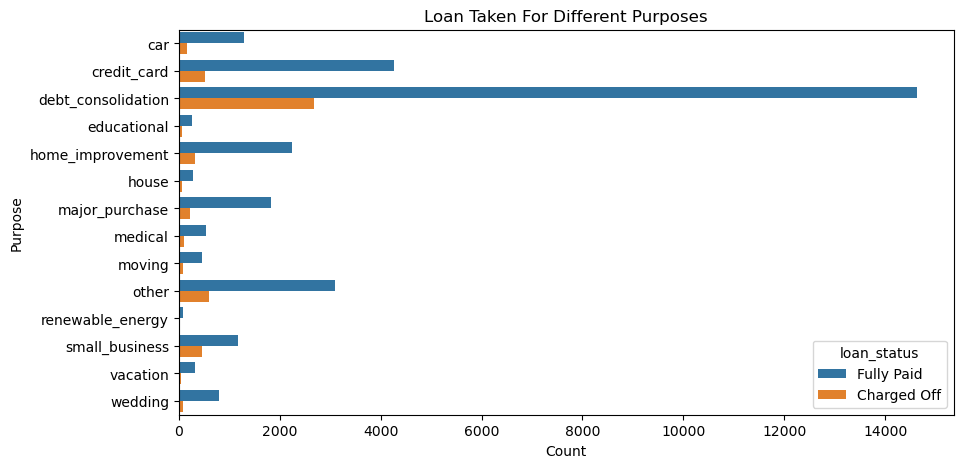

In [131]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data =loan_df,y='purpose',hue='loan_status')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

Observation: Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.

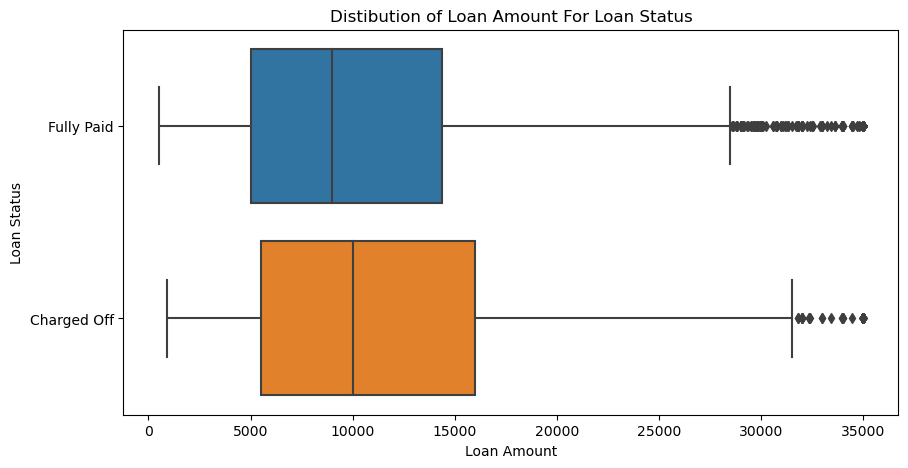

In [132]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

Observation : The mean and 25% percentile are almost nearly same for both but we see larger 75% percentile in the defaulted loan which indicate large amount of loan has higher chance of defaulting.

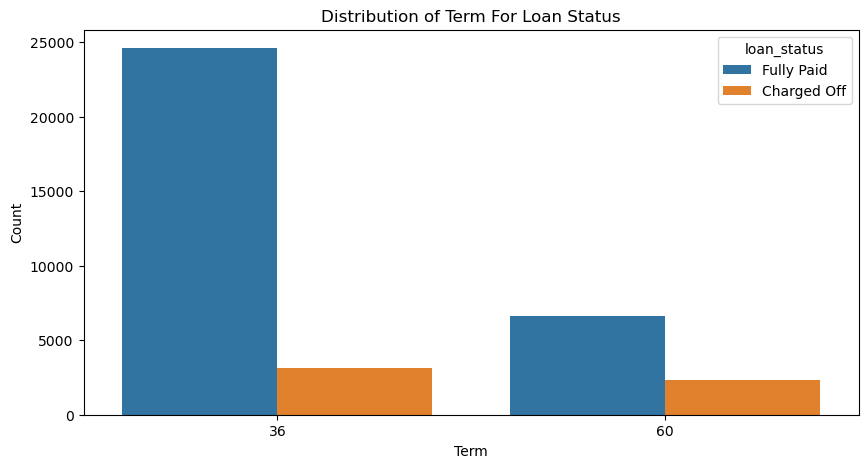

In [133]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

Observation : The 60 month term has higher chance of defaulting than 36 month term

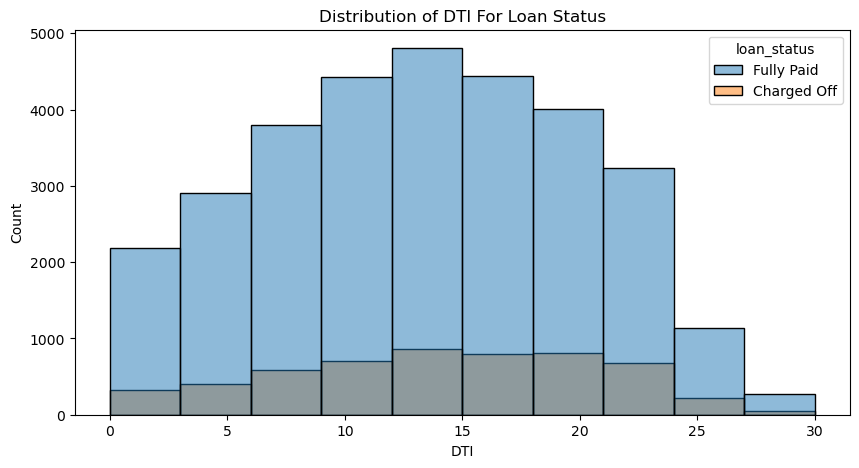

In [134]:
# Distribution of DTI based on Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

Observation : The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.

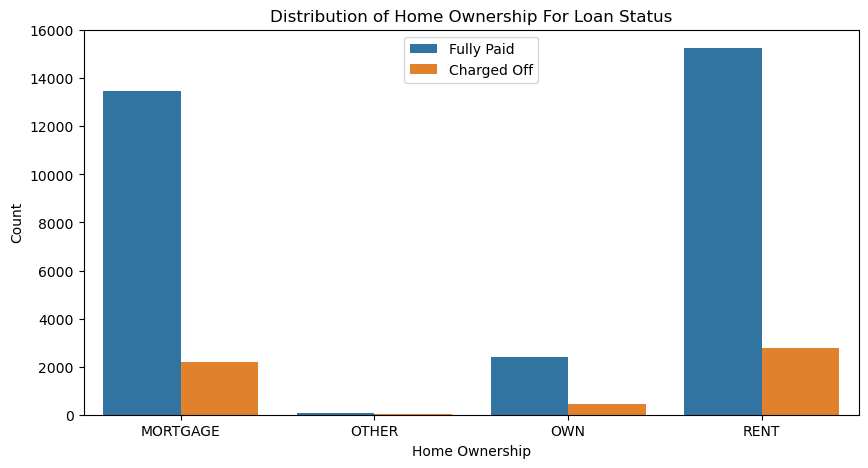

In [135]:
# Distribution of house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

Observation: The Defaulted loan are lower for the burrowers who own their property compared to on mortgage or rent.

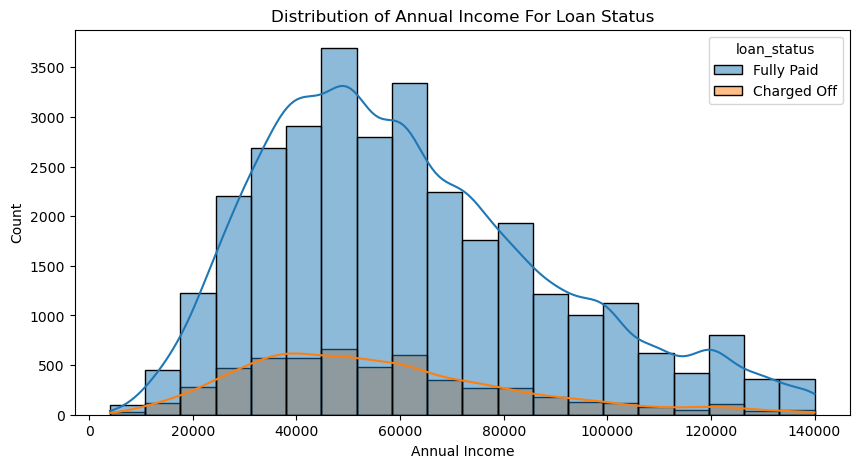

In [136]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

Observation : Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.

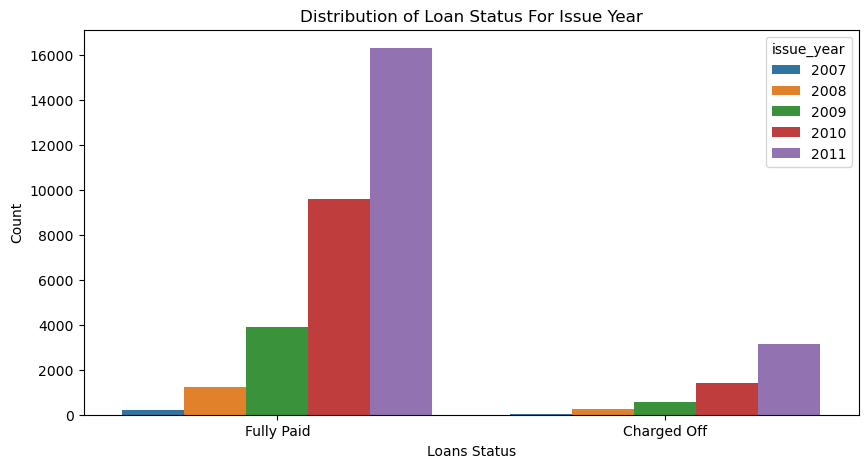

In [137]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()

Observation : Both Fully paid loan and defaulted loan are increasing exponentially with the time .

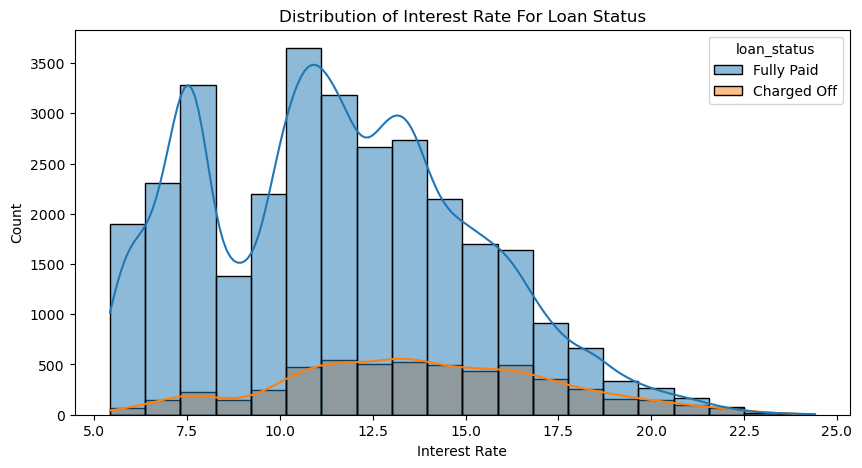

In [138]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_df,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

Observation : The default loan amount increases with interest rate and shows are decline aftre 17 % interest rate.

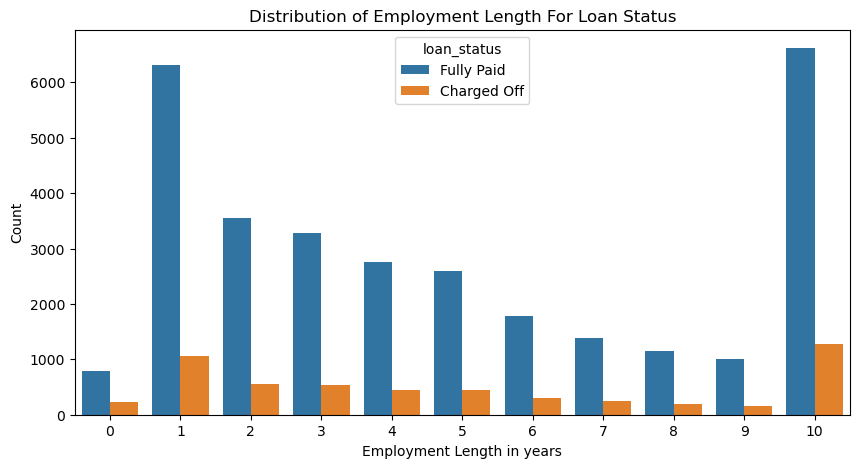

In [139]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_df,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

Observation : The Employees with 1 year and 10+ years of experience are likely to default and have higher chance of fully paying the loan.

## Bivariate Analysis

Boxplot of term Vs loan_amnt


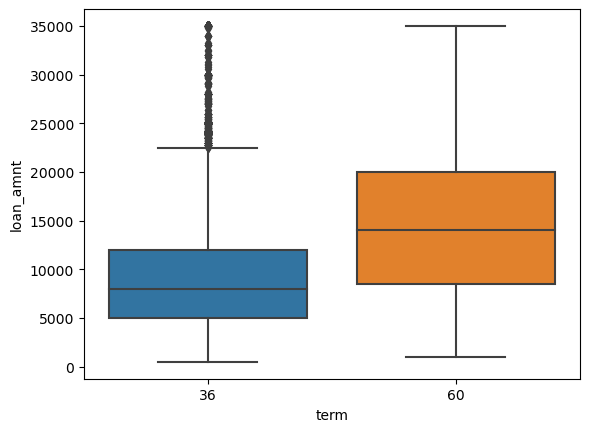

Boxplot of grade Vs loan_amnt


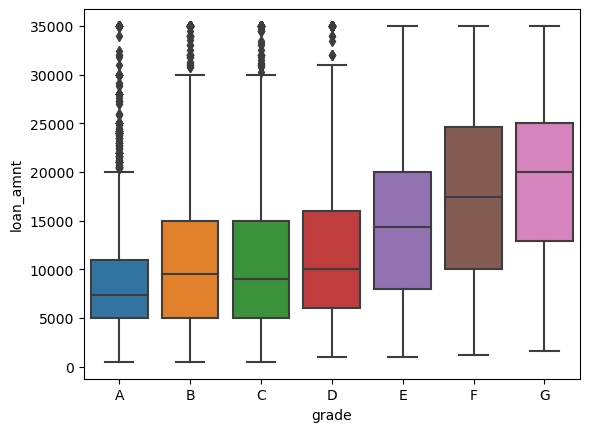

Boxplot of sub_grade Vs loan_amnt


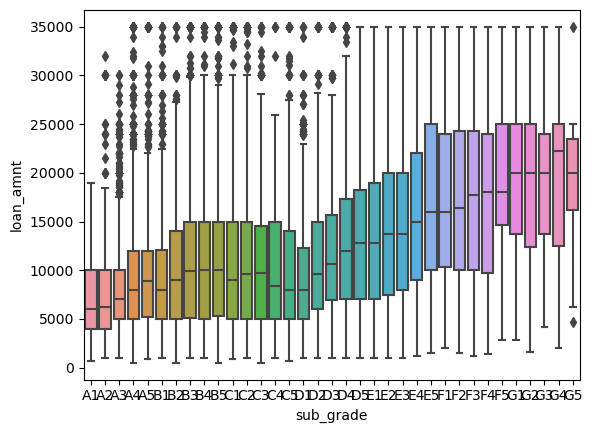

Boxplot of emp_length Vs loan_amnt


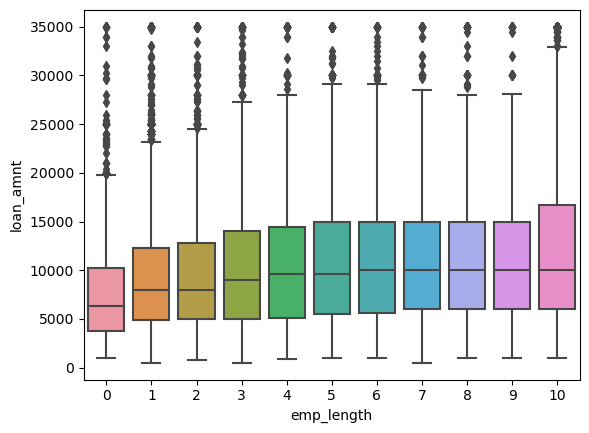

Boxplot of addr_state Vs loan_amnt


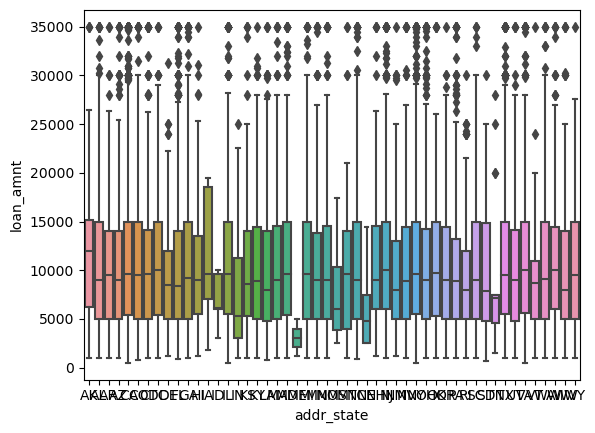

Boxplot of pub_rec_bankruptcies Vs loan_amnt


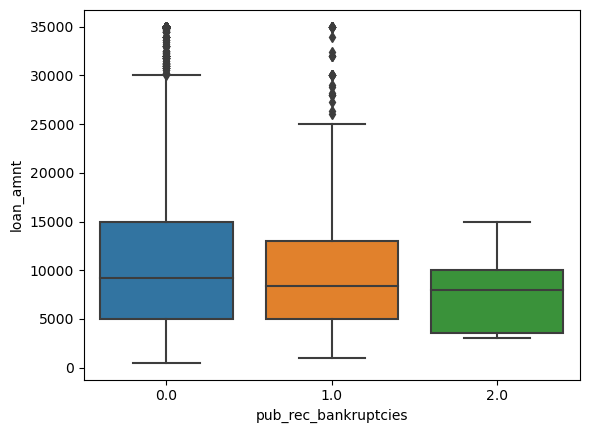

Boxplot of home_ownership Vs loan_amnt


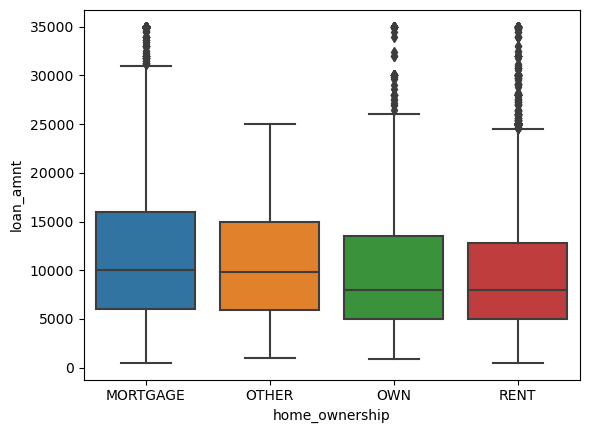

Boxplot of issue_year Vs loan_amnt


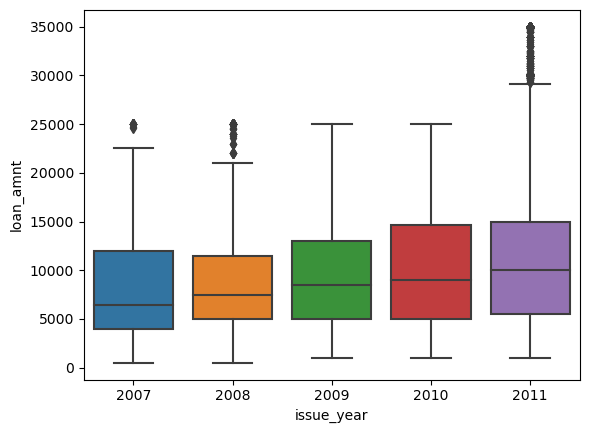

Boxplot of issue_month Vs loan_amnt


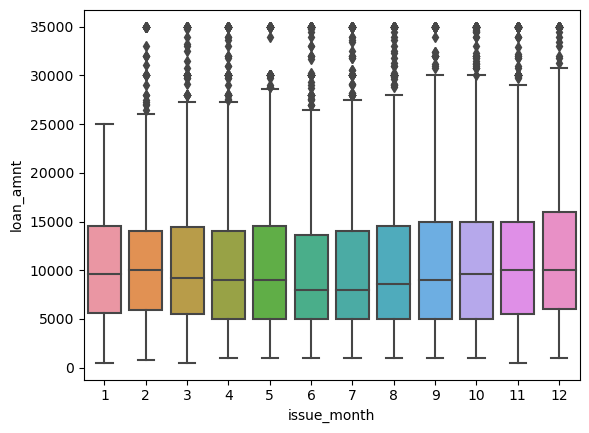

Boxplot of verification_status Vs loan_amnt


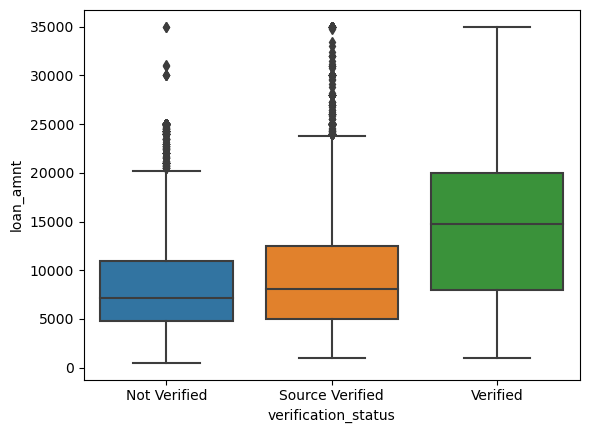

Boxplot of loan_status Vs loan_amnt


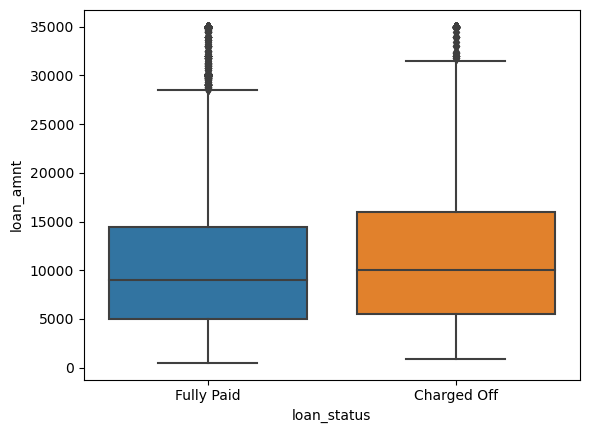

Boxplot of purpose Vs loan_amnt


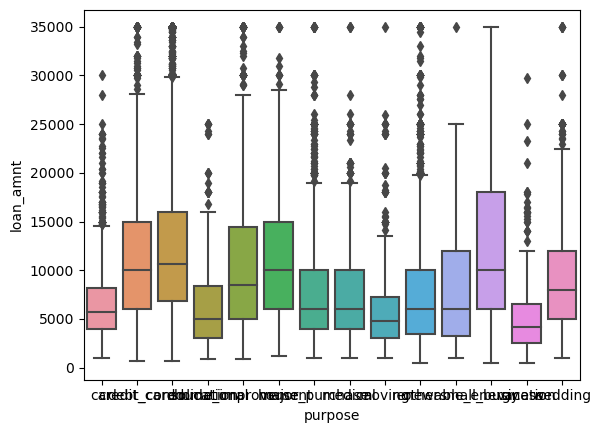

Boxplot of term Vs dti


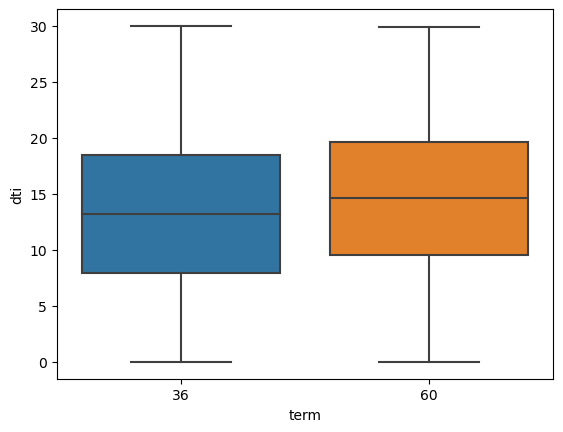

Boxplot of grade Vs dti


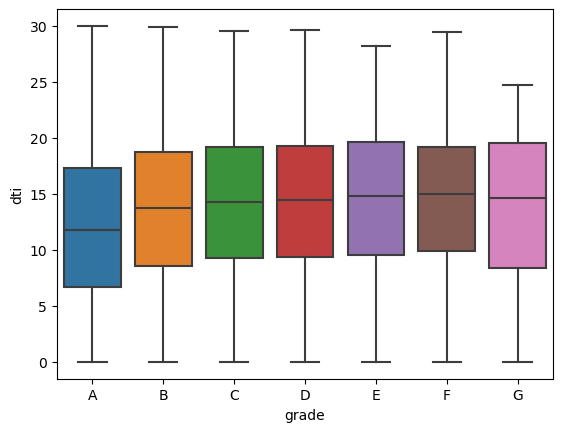

Boxplot of sub_grade Vs dti


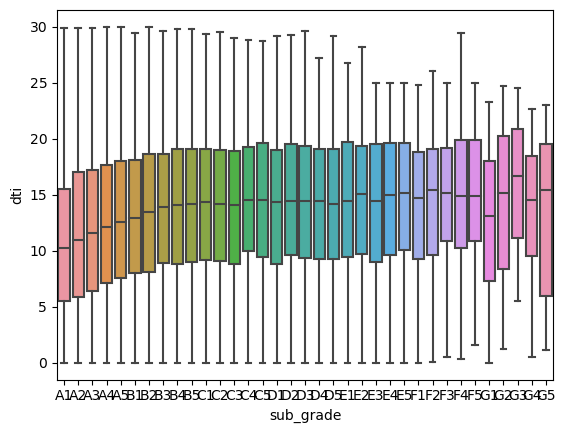

Boxplot of emp_length Vs dti


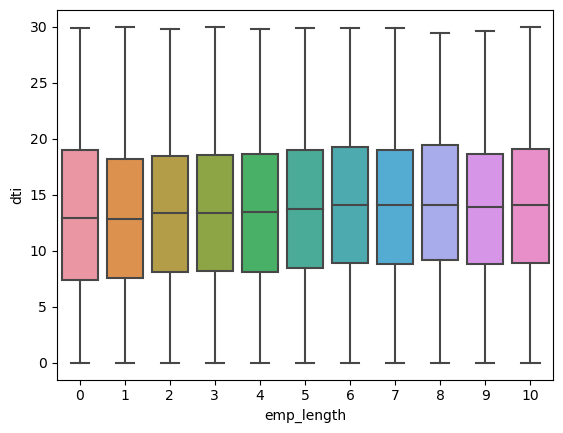

Boxplot of addr_state Vs dti


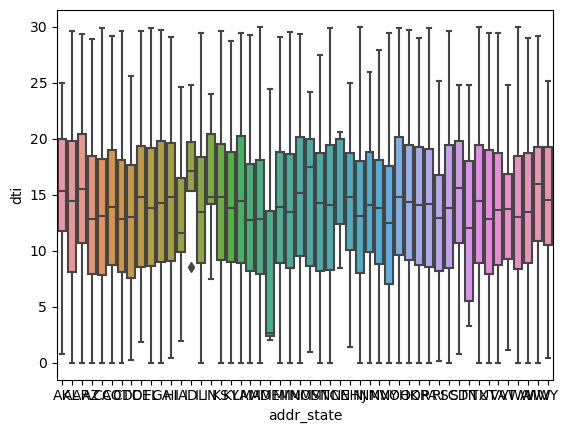

Boxplot of pub_rec_bankruptcies Vs dti


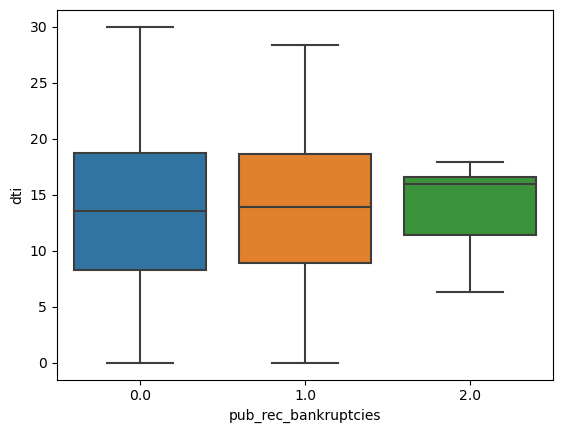

Boxplot of home_ownership Vs dti


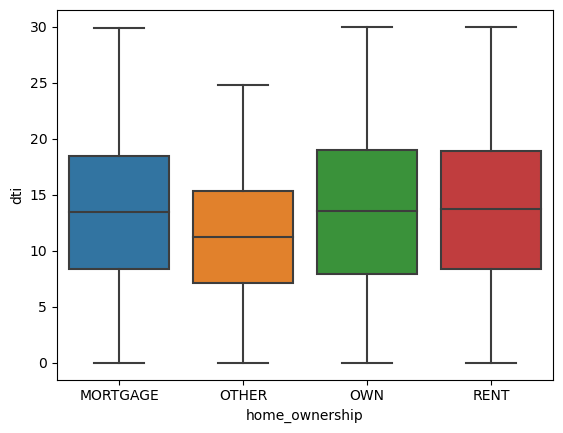

Boxplot of issue_year Vs dti


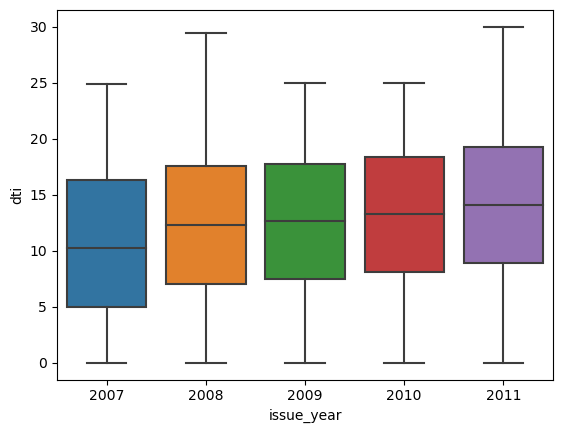

Boxplot of issue_month Vs dti


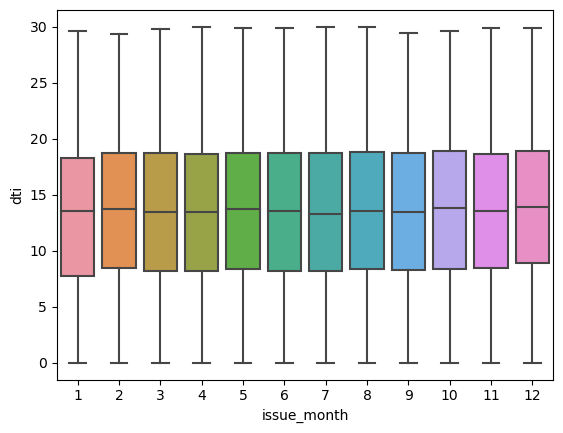

Boxplot of verification_status Vs dti


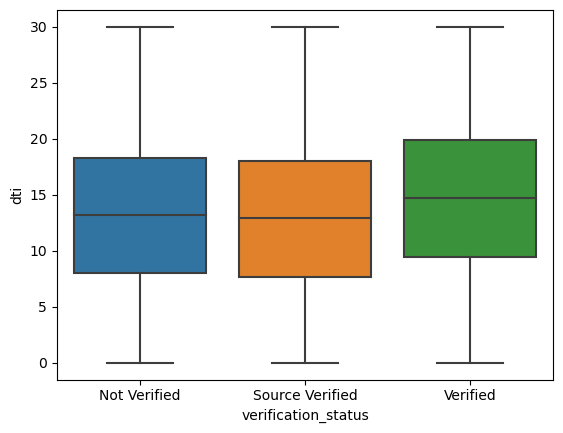

Boxplot of loan_status Vs dti


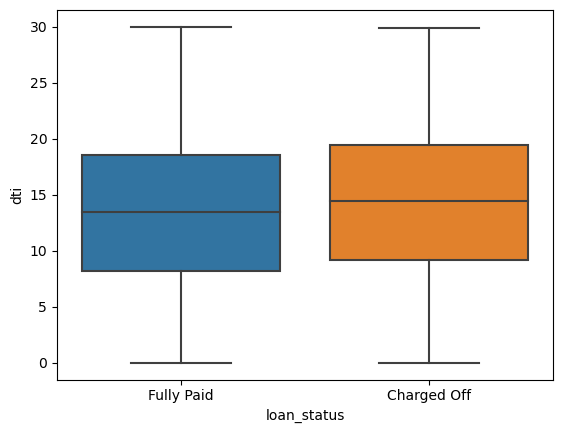

Boxplot of purpose Vs dti


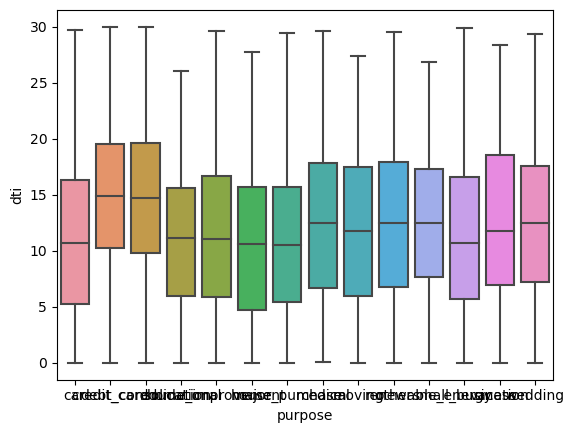

Boxplot of term Vs int_rate


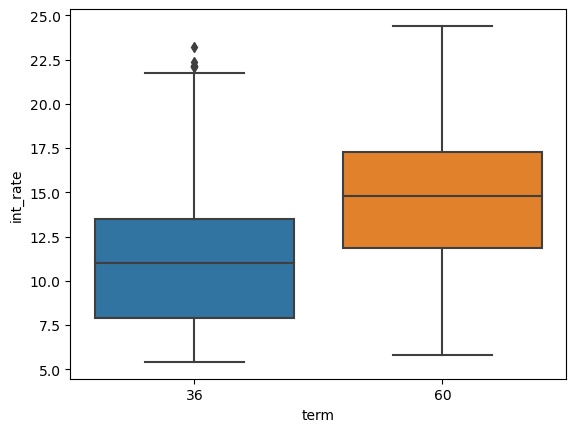

Boxplot of grade Vs int_rate


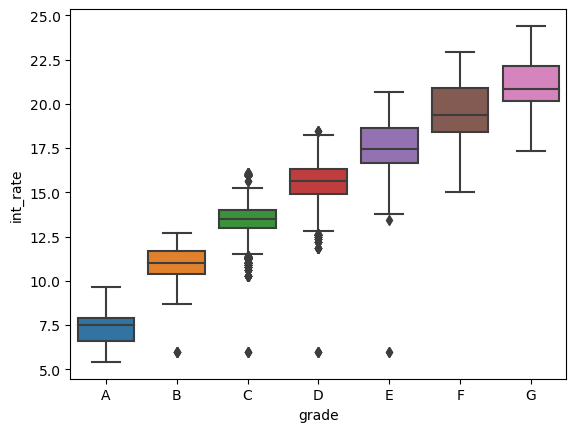

Boxplot of sub_grade Vs int_rate


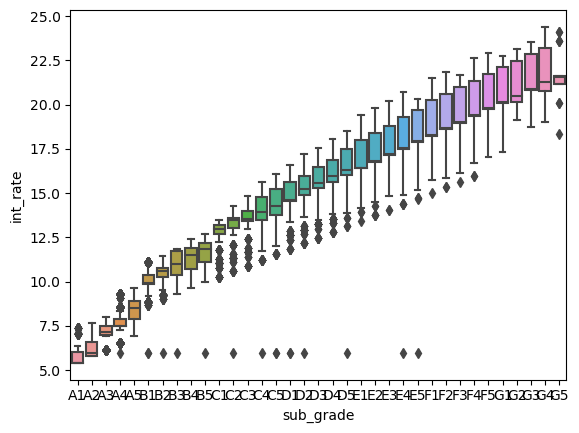

Boxplot of emp_length Vs int_rate


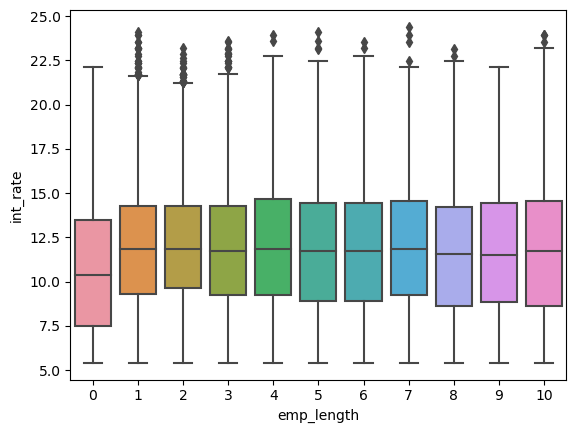

Boxplot of addr_state Vs int_rate


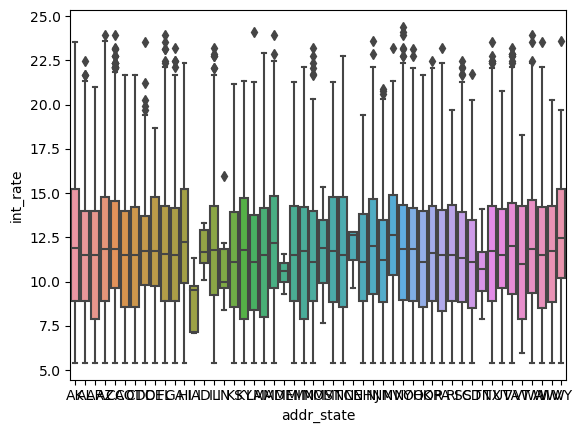

Boxplot of pub_rec_bankruptcies Vs int_rate


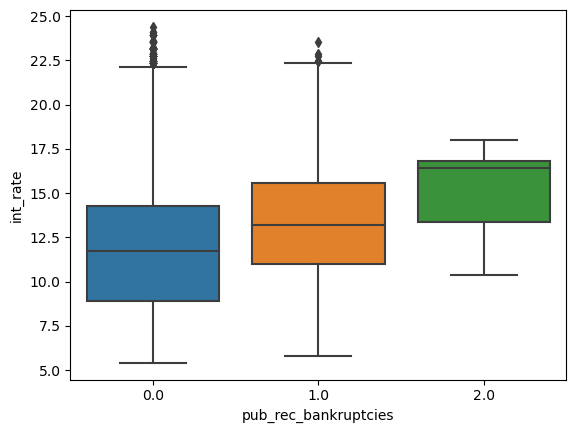

Boxplot of home_ownership Vs int_rate


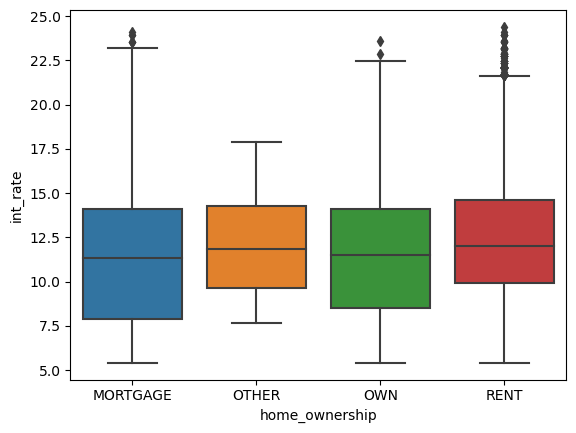

Boxplot of issue_year Vs int_rate


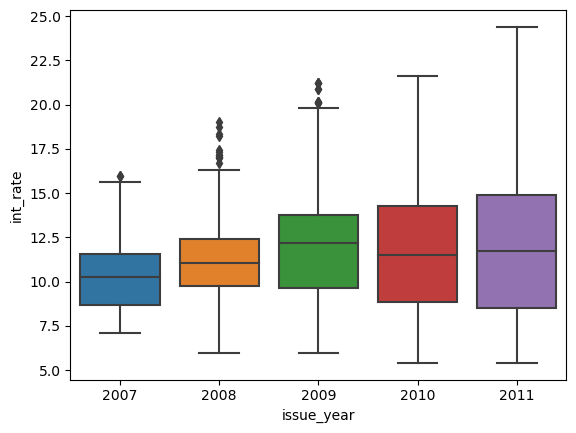

Boxplot of issue_month Vs int_rate


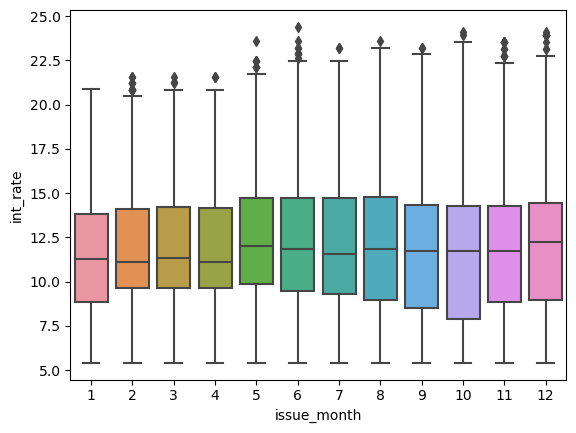

Boxplot of verification_status Vs int_rate


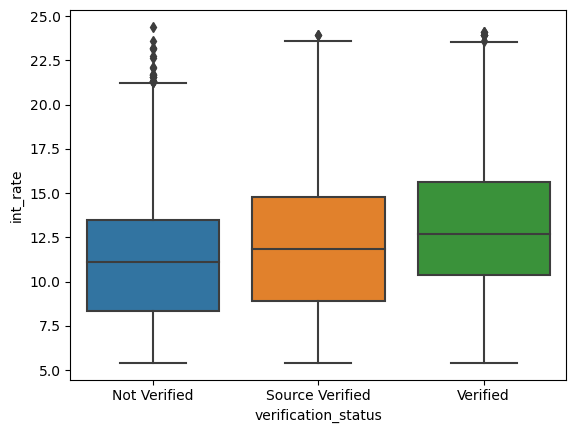

Boxplot of loan_status Vs int_rate


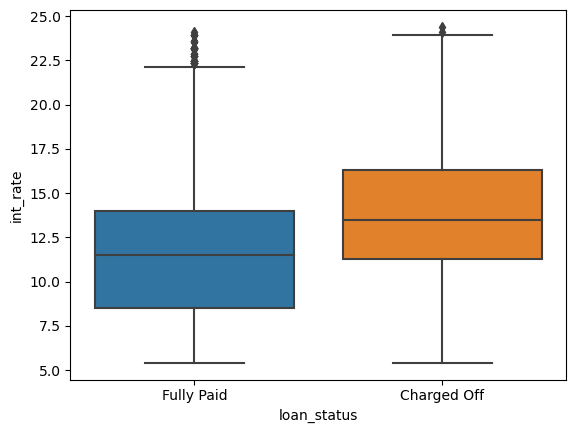

Boxplot of purpose Vs int_rate


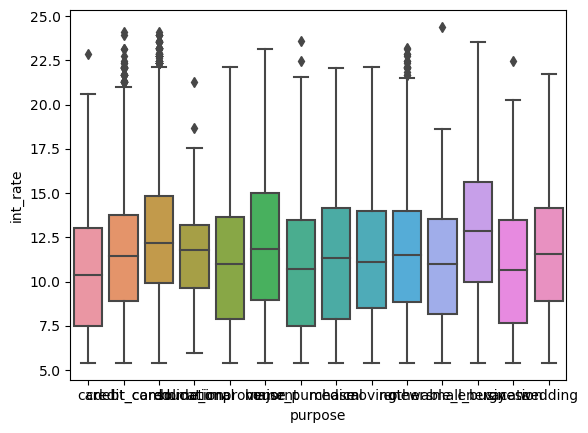

Boxplot of term Vs annual_inc


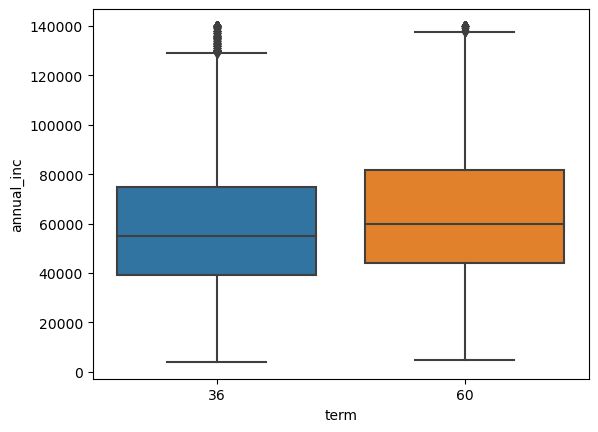

Boxplot of grade Vs annual_inc


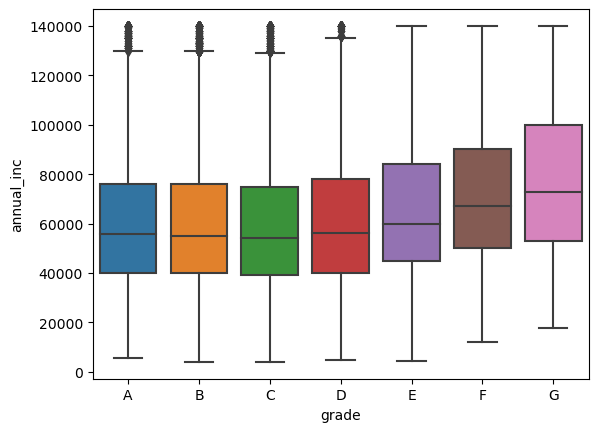

Boxplot of sub_grade Vs annual_inc


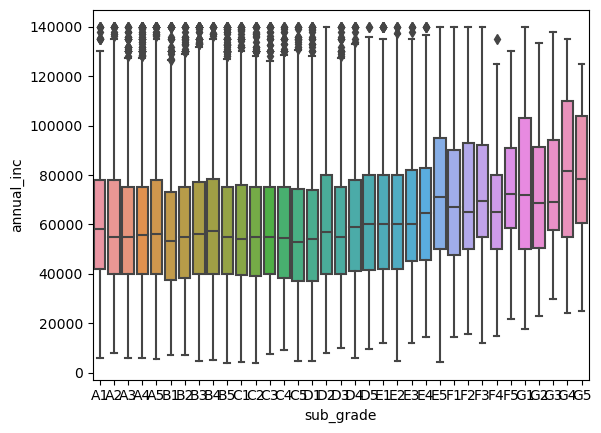

Boxplot of emp_length Vs annual_inc


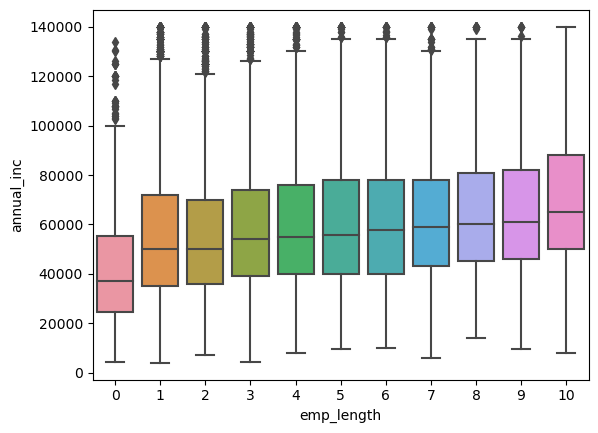

Boxplot of addr_state Vs annual_inc


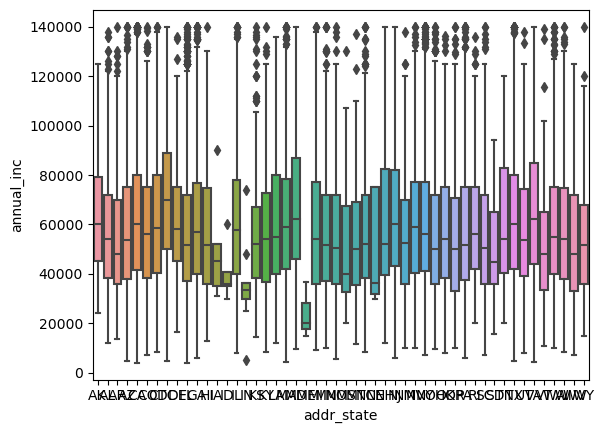

Boxplot of pub_rec_bankruptcies Vs annual_inc


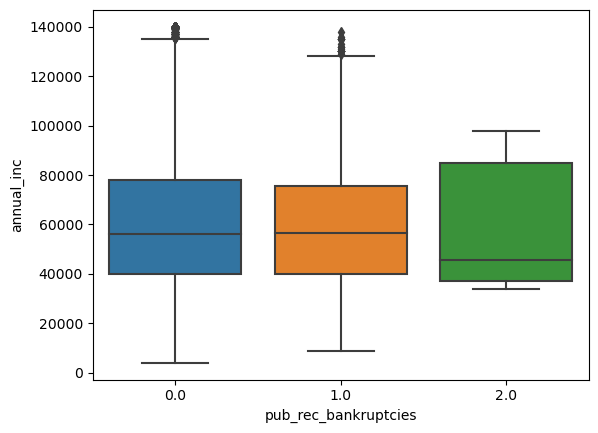

Boxplot of home_ownership Vs annual_inc


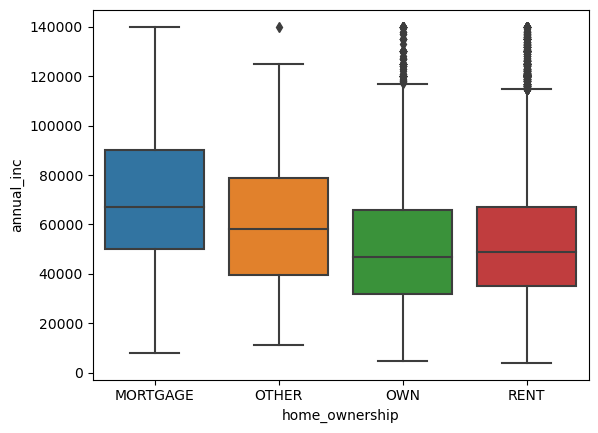

Boxplot of issue_year Vs annual_inc


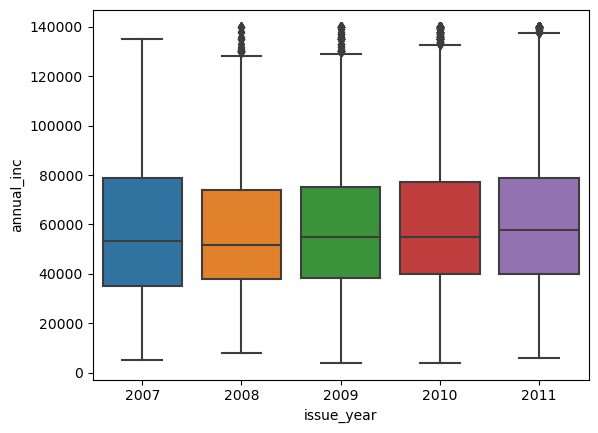

Boxplot of issue_month Vs annual_inc


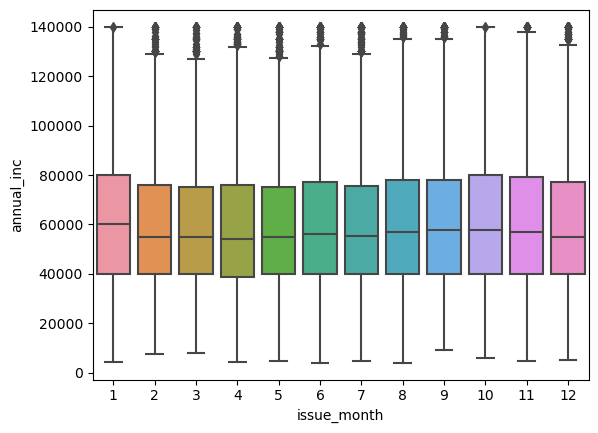

Boxplot of verification_status Vs annual_inc


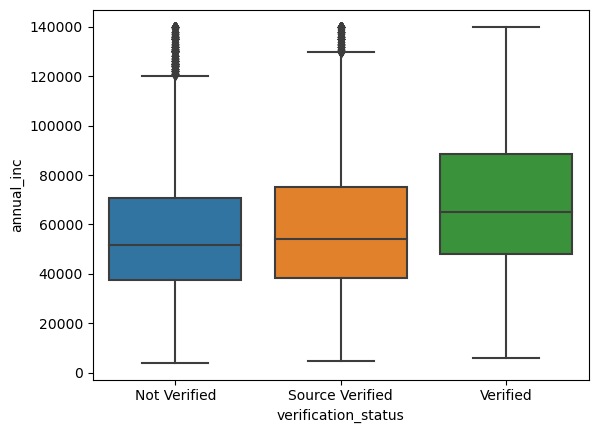

Boxplot of loan_status Vs annual_inc


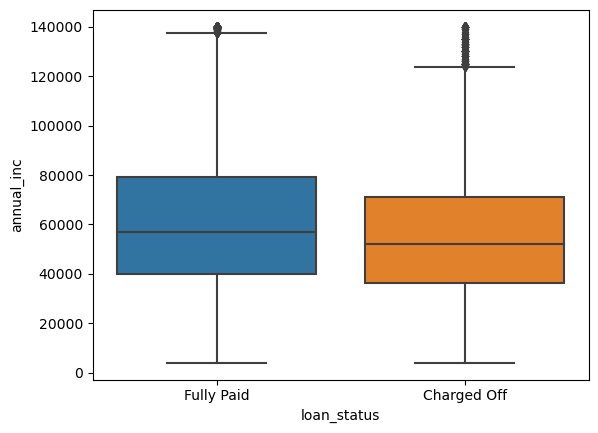

Boxplot of purpose Vs annual_inc


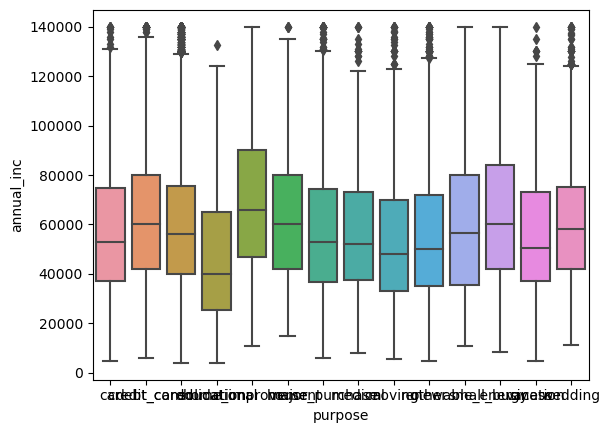

In [140]:
for col2 in num_cols:
    for col1 in cat_cols:
        print("Boxplot of",col1,"Vs",col2)
        sns.boxplot(x=loan_df[col1],y=loan_df[col2])
        plt.show()

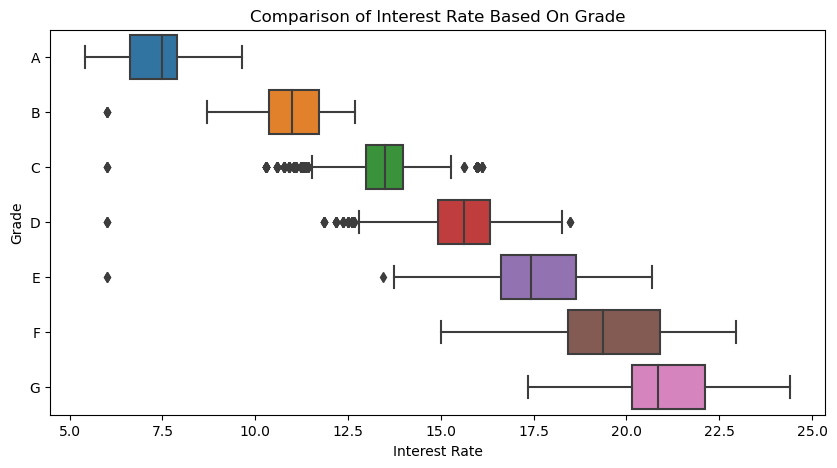

In [141]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_df,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

Observation : As Grade represent risk factor,we can say interest rate increases with the risk.

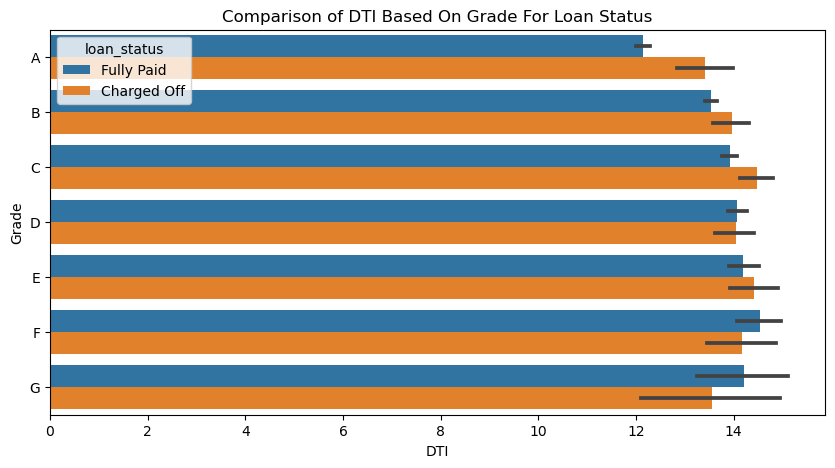

In [142]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_df,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade For Loan Status',fontsize=12)
plt.show()

Observation : The grade A which is lowest risk also has lowest DTI ratio,so by this we can infer that higher grade has lower rate of default.

<Figure size 1000x500 with 0 Axes>

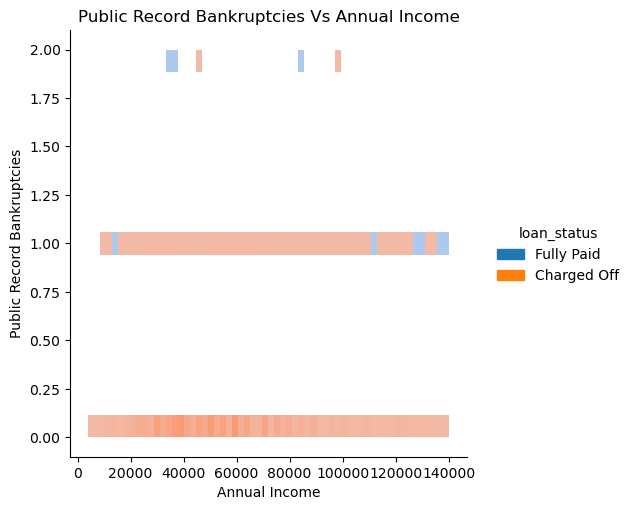

In [143]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(10,5))
sns.displot(y=loan_df["pub_rec_bankruptcies"],x=loan_df["annual_inc"],hue=loan_df.loan_status)
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

Observation: The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.

## Multivariant Analysis

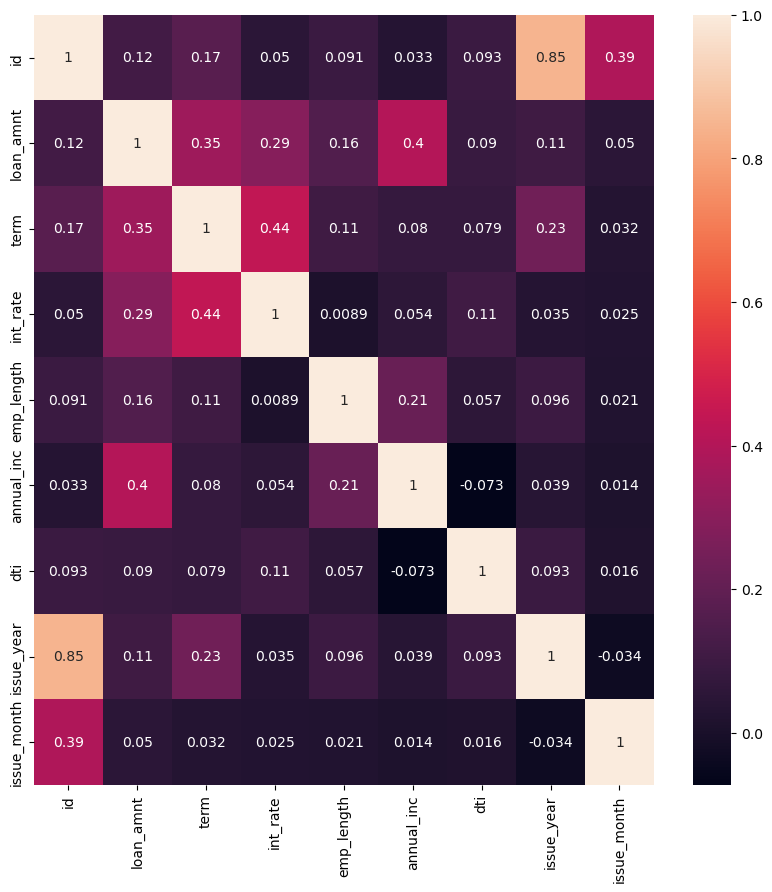

In [144]:
# Heatmap of correlation between variables
plt.figure(figsize=(10,10))
sns.heatmap(loan_df[["id","loan_amnt","term","int_rate","emp_length","annual_inc","dti","issue_year","issue_month"]].corr(),annot=True)
plt.show()

# Insights:



## Univariate Analysis:

The number of defaulted loan is 7 times less than the number of fully paid loan.
The majority of loan has a term of 36 months.
The interest rate is more crowded around 5-10 and 10-15 with a drop near 10.
A large amoutn of loans are with grade 'A' and 'B' commpared to rest showing most loans are high grade loans.
Majority of borrowsers have working experience greater than 10 years.
Majority of borrowsers don't posses property and are on mortage or rent.
About 50% of the borrowers are verified by the company or have source verified.
Annual Income shows left skewed normal distribution thus we can say that the majorityof burrowers have very low annual income compared to rest.
A large percentage of loans are taken for debt consolidation followed by credit card.
Majority of the borrowers are from the large urban cities like california, new york, texas, florida etc.
Majority of the borrowers have very large debt compared to the income registerd, concentrated in the 10-15 DTI ratio.
Majority of the borrowers have no record of Public Recorded Bankruptcy.
Majority of the loans are given in last quarter of the year.
The number of loans approved increases with the time at expontential rate, thus we can say that the loan approval rate is increasing with the time.

## Segmented Univariate Analysis:

Debt Consolidation is the most popular loan purpose and has highest number of fully paid loan and defaulted loan.
The mean and 25% are same for both but we see larger 75% in the defaulted loan which indicate large amount of loan has higher chance of defaulting.
The 60 month term has higher chance of defaulting than 36 month term whereas the 36 month term has higher chance of fully paid loan.
The loans in 36 month term majorily consist of grade A and B loans whereas the loans in 60 month term mostly consist of grade B, C and D loans.
The Loan Status varies with DTI ratio, we can see that the loans in DTI ratio 10-15 have higher number of defaulted loan but higher dti has higher chance of defaulting.
The Defaulted loan are lower for the burrowers which own their property compared to on mortgage or rent.
Burrowers with less 50000 annual income are more likely to default and higher annual income are less likely to default.
The Fully paid loan are increasing exponentially with the time compared to defaulted loan.
The default loan amount increases with interest rate and shows are decline aftre 17.5 % interest rate.
The Employees with 10+ years of experience are likely to default and have higher chance of fully paying the loan.

## Bivariate Analysis:

The Grade represent risk factor thus we can say interst rate increases with the risk.
The Grade A which is lowest risk also has lowest DTI ratio which we can say that higher grade has lower rate of default.
The brrowers are mostly having no record of Public Recorded Bankruptcy and are safe choice for loan issue.


# Recommendations:

Major Driving factors used to predict the chance of defaulting and avoiding Credit Loss are:

DTI
Grades
Verification Status
Annual income
Pub_rec_bankruptcies


Other considerations for 'defaulters' :
Burrowers who are not from large urban cities like california, new york, texas, florida etc.
Burrowers having annual income in the range 50000-100000.
Burrowers having Public Recorded Bankruptcy.
Burrowers with least grades like E,F,G which indicates high risk.
Burrowers with very high Debt to Income value.
Burrowers with working experience 1 year and 10+ years.